# **Cas Gymlib**

# Introduction

Un document excel .xlsx m'a été partagé par l'entreprise Gymlib.

Le but de ce projet est d'analyser ce document afin d'en faire ressortir des informations pertinentes et de proposer d'éventuelles recommandations stratégiques qui en découleraient.

### Sommaire

1. **Exploration des données**
2. **Analyse des données**<br/> 
    a. **La fréquentation des salles**  
    b. **Les entreprises sportives**<br/> 
    c. **Le montant reversé aux salles partenaires**<br/> 
    d. **Le MRR** <br/> 
    e. **Les adhérents ayant résilié leurs abonnement**<br/> 
3. **Recommandations**


### 1) Exploration des données

Le document est composé de trois onglets : "Companies", "Pass", "Utilisateurs".

Ces données correspondent à un échantillon de ce que Gymlib peut collecter comme données sur ses utilisateurs, salles partenaires ou entreprises clientes. 

NB : Nous parlerons de "salle" tout du long de ce document pour des questions de practicité, quand bien même l'offre Gymlib ne se limite pas aux salles de sports mais à un ensemble d'activité beaucoup plus large.

Ouvrons tout d'abord le fichier sur Python afin de pouvoir l'explorer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import pyensae

In [2]:
df1 = pd.read_excel('Gymlib.xlsx', 'Companies')
df2 = pd.read_excel('Gymlib.xlsx', 'Pass')
df3 = pd.read_excel('Gymlib.xlsx', 'Utilisateurs')

##### Premier onglet

Nous avons dans ce premier tableau :

- Company_id : un identifiant unique par entreprise cliente
- 08/2019 : les mois sur lesquels ont été collecté ces données (Août, Septembre, Octobre)
- MRR entreprise : correspond au *Monthly recurring revenue*, soit les revenues récurrents que génère chaque entreprise cliente de Gymlib par mois.  Ce MRR est apporté grâce aux adhérents des entreprises.
- *Effectif eligible* correspond  au nombre d'employés pour chaque entreprise cliente 

Nous avons donc à disposition un panel de 10 entreprises.

In [3]:
df1

,CompanyId,08/2019,Unnamed: 2,09/2019,Unnamed: 4,10/2019,Unnamed: 6
0,NaN,MRR entreprise,Effectif eligible,MRR entreprise,Effectif eligible,MRR entreprise,Effectif eligible
1,2.087321e+08,6395,2808,6395,2808,9000,2808
2,2.948926e+08,5500,5500,5500,5500,7000,5500
3,3.232468e+08,4205.11,178,4205.11,178,4564.07,178
4,3.800707e+08,3651.52,4000,3651.52,4000,5360,4000
5,4.615106e+08,600,293,600,293,600,293
6,6.742648e+08,200,8,200,8,200,8
7,8.259959e+08,3062.5,360,3062.5,360,3062.5,360
8,8.632853e+08,458,15,458,15,458,15
9,8.817256e+08,1552,160,1552,160,1552,160


Avant même d'ouvrir les autres onglets nous nous rendons compte que le premier onglet à un index multiple, nous allons l'aplanir et changer les noms des colonnes en fonction des mois.

In [4]:
df1 = pd.read_excel('Gymlib.xlsx', 'Companies', header = [0,1])
df1.columns = ["company_id","mrr_entreprise_08","effectif_eligible_08","mrr_entreprise_09","effectif_eligible_09","mrr_entreprise_10","effectif_eligible_10"]
df1

,company_id,mrr_entreprise_08,effectif_eligible_08,mrr_entreprise_09,effectif_eligible_09,mrr_entreprise_10,effectif_eligible_10
0,208732121,6395.00,2808,6395.00,2808,9000.00,2808
1,294892643,5500.00,5500,5500.00,5500,7000.00,5500
2,323246782,4205.11,178,4205.11,178,4564.07,178
3,380070690,3651.52,4000,3651.52,4000,5360.00,4000
4,461510553,600.00,293,600.00,293,600.00,293
5,674264823,200.00,8,200.00,8,200.00,8
6,825995937,3062.50,360,3062.50,360,3062.50,360
7,863285309,458.00,15,458.00,15,458.00,15
8,881725560,1552.00,160,1552.00,160,1552.00,160
9,2120362044,1000.00,200,1000.00,200,1000.00,200


##### Deuxième onglet

Ce deuxième tableau est plus complexe, inspectons le tout d'abord :

In [5]:
df2.head()

,code ( = 1 passage en salle),gym_id,Months in Common Date,user_id,CompanyId,Total Montant reversé par pass
0,10959,595f5752b2e9c64372720278,2019-08-01,5bc198a3301efa48936332b6,208732121,12.0
1,11037,5a66f9002e067465f5a38745,2019-10-01,5d060100f37d17a76a44517f,294892643,24.0
2,11502,5b8558a3d23a875db16976d3,2019-10-01,5ba2264f71438347e0195c00,294892643,18.0
3,19156,5b0d75a266922c6bdd352e1e,2019-08-01,5d1255d6ad522d5ba57a4c65,208732121,11.0
4,23235,5b2bc6633df61120eda0efe7,2019-08-01,5cae3acd56bf8873225994da,294892643,16.0


Renommons rapidement les noms de nos colonnes pour mieux nous y retrouver par la suite

In [6]:
df2.columns = ["code","gym_id","months","user_id","company_id","montant_reversé_pass"]

In [7]:
df2.shape[0] #nombre total de passages sur les 3 mois

21361

In [8]:
df2["code"].value_counts().max() #on vérifie que chaque identifiant de passage est unique

1

In [9]:
df2["months"].value_counts() #on vérifie qu'il n'y a bien que 3 mois qui apparaissent dans notre colonne "month"

2019-10-01    8677
2019-09-01    7433
2019-08-01    5251
Name: months, dtype: int64

In [10]:
df2_company = df2["company_id"].unique().sort() 
df1_company = df1["company_id"].unique().sort()

#on vérifie que notre liste d'identifiants d'entreprises correspond bien à celles du premier onglet

df1_company == df2_company

True

Maintenant tâchons de comprend comment fonctionne la colonne "montant_reversé_pass".

Prenons le premier adhérent de la liste et observons son nombre de passage en salle.

In [11]:
df2["montant_reversé_pass"][(df2["user_id"] == "5bc198a3301efa48936332b6")]

0        12.0
4035      8.5
4360      8.5
5909     12.0
7861      8.5
8525     12.0
11975     3.5
13352     8.5
16215    12.0
16789     8.5
16855     8.5
18097    12.0
20319     8.5
Name: montant_reversé_pass, dtype: float64

Nous voyons des valeurs différentes en fonction de ses passages sur les trois mois. Regardons plus précisemment sur Octobre.

In [12]:
df2["montant_reversé_pass"][(df2["user_id"] == "5bc198a3301efa48936332b6") & (df2["months"] == "2019-10-01")]

4035     8.5
11975    3.5
16789    8.5
20319    8.5
Name: montant_reversé_pass, dtype: float64

In [13]:
print(df2.loc[4035,["gym_id","montant_reversé_pass"]])
print(df2.loc[11975,["gym_id","montant_reversé_pass"]])
print(df2.loc[16789,["gym_id","montant_reversé_pass"]])
print(df2.loc[20319,["gym_id","montant_reversé_pass"]])


gym_id                  574bbc689f3ce3c25642879c
montant_reversé_pass                         8.5
Name: 4035, dtype: object
gym_id                  5ce3fce6d9ec8745d6afc95f
montant_reversé_pass                         3.5
Name: 11975, dtype: object
gym_id                  574bbc689f3ce3c25642879c
montant_reversé_pass                         8.5
Name: 16789, dtype: object
gym_id                  574bbc689f3ce3c25642879c
montant_reversé_pass                         8.5
Name: 20319, dtype: object


On s'aperçoit que lorsque le code de la salle change, le montant reversé par mois varie.

Cela correspond à la somme reversé à la salle partenaire à chaque passage de cet adhérent dans une salle spécifique. 

Dans ce second dataframe nous avons accès aux 21361 passages des employés dans chaque salle partenaire du réseau Gymlib. Ainsi nous avons :

- code : un code passage unique lorsque un adhérent se rend à une salle partenaire
- gym_id : l'identifiant de la salle partenaire dans laquelle l'adhérent s'est rendu
- months : le mois où l'adhérent s'est rendu à la salle partenaire (Aout, Septembre ou Octobre)
- user_id : l'identifiant unique de l'adhérent
- companyID : l'identifiant de l'entreprise où l'adhérent est salarié, que l'on retrouve sur le premier onglet (primary key)
- montant_reversé_pass : la rémunération destiné à la salle pour chaque passage de l'adhérent dans cette salle

### Troisème onglet

Maintenant jetons un oeil à notre troisième onglet/dataframe.

In [14]:
df3.head()

,_id,CompanyId,zipcode,Country,Age,Statut user
0,5db74c2948defd35145798dd,380070690,59173,France,34.0,active
1,5ba21db84644594b6ccbf69c,294892643,N\A,France,NaN,active
2,5c06b5a864793161e718b67c,294892643,N\A,France,NaN,active
3,5bb5d99112955e40f79a985a,294892643,N\A,France,NaN,active
4,5ba8fda98603fa6b36fa031e,294892643,N\A,France,NaN,active


In [15]:
df3.columns = ["user_id", "company_id", "zipcode", "country", "age", "statut_user"]
df3.head() #on renomme les colonnes pour que les noms correspondent à ceux choisis pour les deux onglets précédents

,user_id,company_id,zipcode,country,age,statut_user
0,5db74c2948defd35145798dd,380070690,59173,France,34.0,active
1,5ba21db84644594b6ccbf69c,294892643,N\A,France,NaN,active
2,5c06b5a864793161e718b67c,294892643,N\A,France,NaN,active
3,5bb5d99112955e40f79a985a,294892643,N\A,France,NaN,active
4,5ba8fda98603fa6b36fa031e,294892643,N\A,France,NaN,active


Nous avons donc accès aux 2348 utilisateurs unique du dataset, vérifions qu'ils soient bien uniques.

In [16]:
len(df3["user_id"].unique())

2348

La colonne *zipcode* peut indiquer où cet adhérent travaille ou bien où il habite, voyons voir les zipcodes les plus fréquents de notre liste :

In [17]:
df3["zipcode"].value_counts().sort_values(ascending = False)

75017    163
75015    128
75011     91
75018     89
92400     69
        ... 
69007      1
59790      1
69005      1
60300      1
78940      1
Name: zipcode, Length: 365, dtype: int64

In [18]:
df3["string_or_not"] = [isinstance(x, str) for x in df3["zipcode"]]
df3[df3["string_or_not"] == True]

,user_id,company_id,zipcode,country,age,statut_user,string_or_not
1,5ba21db84644594b6ccbf69c,294892643,N\A,France,NaN,active,True
2,5c06b5a864793161e718b67c,294892643,N\A,France,NaN,active,True
3,5bb5d99112955e40f79a985a,294892643,N\A,France,NaN,active,True
4,5ba8fda98603fa6b36fa031e,294892643,N\A,France,NaN,active,True
5,5ba8a44d36702a299ae8a33c,294892643,N\A,France,27.0,active,True
6,5ba2375819a2fc5f7f3f19c0,294892643,N\A,France,NaN,active,True
7,5ba21e84b3b73869469045c7,294892643,N\A,France,NaN,active,True
421,5ba39a1b8a6135627f7129c5,294892643,N\A,France,NaN,active,True
2242,5d06315af37d17d7f7445a20,294892643,Utilisateur anonyme,France,41.0,canceled,True
2243,5bc9c2985c7ece58c7645f80,208732121,Utilisateur anonyme,France,29.0,canceled,True


In [19]:
df3 = df3.drop(columns = ["string_or_not"])

Avant d'aller plus loin nous allons nettoyer la colonne zipcode où se sont glissées quelques erreurs.

Nous avons un code postal *7501i*, des valeurs manquantes qu'il faut indiquer comme nulles et 2 lignes *Utilisateur anonyme* pour zipcode.

In [20]:
df3["zipcode"]= df3["zipcode"].replace(["7501i",'Utilisateur anonyme'], np.nan).fillna(0)

In [21]:
df3["zipcode"]= df3["zipcode"].replace("N\A", np.nan).fillna(0)
#On fill les cases nulles

Ces code postaux correspondent plutôt à des zones résidentiels (le 18 ème ou le 15 ème à Paris ont peu de siège d'entreprises), il s'agirait donc plutôt de leur adresse personnelle.

Nous avons donc :

- user_id : l'identifiant unique de l'utilisateur, comme dans l'onglet précédent
- company_id : l'identifiant de l'entreprise où il est salarié
- zipcode :le zipcode où l'adhérent habite
- age : l'âge de l'adhérent
- statut_user :  son inscription est active ou a été interrompu

# 2) Analyse des données

Maintenant que nous avons parcouru nos datasets nous allons nous focaliser sur plusieurs points :  

a. comment les salles sont-elles fréquentées?  
b. quelles sont les entreprises les plus sportives?  
c. mieux comprendre le fonctionnement du montant reversé aux salles partenaires  
d. qu'est ce que le MRR entreprise?  
e. qui sont les anciens adhérents qui ont résilié leur abonnement Gymlib et pourquoi?  

De chacune de ces questions nous pourrons tirer des conclusions qui nous permettront parfois de faire des recommandations stratégiques à Gymlib.

## a) Comment les salles sont-elles fréquentées?

###### Fréquentation par salles

Commençons par nous intéresser à la fréquentation des salles partenaires. Attirent-elles toutes le même nombre de personnes?

In [22]:
nbr_pass_per_gym = df2.groupby("gym_id")["code"].count().sort_values(ascending = False)

nbr_pass_per_gym = pd.DataFrame(nbr_pass_per_gym).reset_index()
nbr_pass_per_gym.columns = ["gym_id","nbr_passages"]

nbr_pass_per_gym.describe()

,nbr_passages
count,791.000000
mean,27.005057
std,82.630579
min,1.000000
25%,2.000000
50%,5.000000
75%,17.000000
max,1073.000000


On peut voir que le minimum de passages d'adhérents sur les trois mois est d'une seule personne et le maximum est de 1073 passages avec un écart moyen de près de 83 passages. 

Cela indique de grande disparité dans la fréquentation des salles par les adhérents Gymlib. 

Visualisons cela.

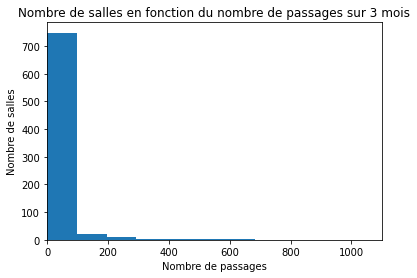

In [103]:
fig, ax = plt.subplots()
ax.set(xlim=[0,1100])
ax.hist(nbr_pass_per_gym["nbr_passages"], bins = 11)
plt.title("Nombre de salles en fonction du nombre de passages sur 3 mois")
plt.xlabel("Nombre de passages")
plt.ylabel("Nombre de salles")

plt.show()

L'écrasante majorité des salles ont reçu moins de 100 visites sur trois mois, regardons avec une granularité plus fine ce qu'il se passe pour ces salles.

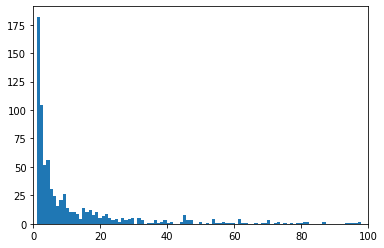

In [25]:
fig, ax = plt.subplots()
ax.set(xlim=[0,100])
ax.hist(nbr_pass_per_gym[nbr_pass_per_gym["nbr_passages"] < 100]["nbr_passages"], bins = 100)
plt.show()

On s'aperçoit, en montant le nombre de "bins" à 100 (donc chaque barre du graphique représente un chiffre entre 1 et 100, que plus de 175 salles (sur nos 791) n'a acceuilli qu'un seul adhérent pour un seul passage sur les trois mois!

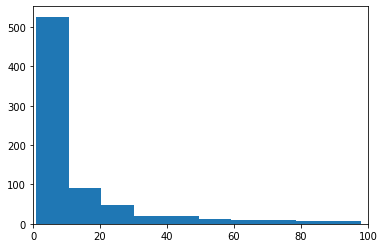

In [26]:
fig, ax = plt.subplots()
ax.set(xlim=[0,100])
ax.hist(nbr_pass_per_gym[nbr_pass_per_gym["nbr_passages"] < 100]["nbr_passages"], bins = 10)
plt.show()

Et au total c'est plus de 500 salles sur nos 791 qui ont acceuilli 10 passages ou moins d'adhérents (et non pas d'adhérents unique) sur les trois mois.

On a donc une grande majorité de salles très peu visités et à l'autre bout du graphique regardons les salles qui attirent le plus de monde.

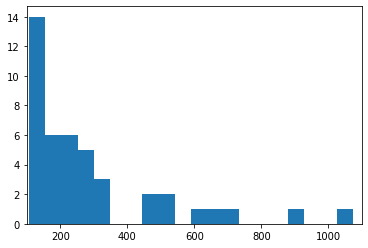

In [27]:
fig, ax = plt.subplots()
ax.set(xlim=[100,1100])
ax.hist(nbr_pass_per_gym[nbr_pass_per_gym["nbr_passages"] > 100]["nbr_passages"], bins = 20)
plt.show()

On retrouve:
- 20 salles entre 100 et 200 passages
- 20 salles entre 200 et 350 passages
- 9 salles à plus de 400 passages

Créons des catégories pour mieux visualiser le poids de chaque groupe de salles.

Nous choisirons ces bornes en nombre de passages pour notre graphique : 

    - 1 seul, entre 2 et 10, entre 11 et 100, entre 101 et 400, plus de 400
    
Créons en plus deux colonne de ratios :
- entre le nombre de salles dans une catégorie par rapport au nombre de salles total
- entre le nombre de passages par rapport au nombre de passages total

In [28]:
#on calcule nos deux colonnes de pourcentages
nbr_pass_per_gym["en_%_des_salles"] = (1/nbr_pass_per_gym.shape[0]*100)
nbr_pass_per_gym["en_%_de_passages"] = (nbr_pass_per_gym["nbr_passages"]/df2.shape[0]*100)

In [29]:
#créons nos catégories
bins = [0,2,11,101,401,1100]
labels = ["             1 passage", "   Entre 2 et 10 passages"," Entre 11 et 100 passages","Entre 101 et 400 passages","     Plus de 400 passages"]
nbr_pass_per_gym["group_passages"] = pd.cut(nbr_pass_per_gym["nbr_passages"],bins=bins, labels=labels, right=False)
nbr_pass_per_gym

,gym_id,nbr_passages,en_%_des_salles,en_%_de_passages,group_passages
0,5b8558a3d23a875db16976d3,1073,0.126422,5.023173,Plus de 400 passages
1,5c2dd2c274e87e4fb2a1757e,906,0.126422,4.241374,Plus de 400 passages
2,5b2bbc187341a56566b55cb7,725,0.126422,3.394036,Plus de 400 passages
3,5c18f55dd11b003e38e5a7e5,639,0.126422,2.991433,Plus de 400 passages
4,5c2dd44774e87e4fb2a17597,599,0.126422,2.804176,Plus de 400 passages
...,...,...,...,...,...
786,5b0eb987cff2d372bfd9d006,1,0.126422,0.004681,1 passage
787,5b1e7bccda12a42dcb6f22de,1,0.126422,0.004681,1 passage
788,5b27c4e3bc2ac6650ac1361b,1,0.126422,0.004681,1 passage
789,5dadb0ce5a762e33c6af243b,1,0.126422,0.004681,1 passage


In [30]:
#on créé notre dataframe final pour le graphique
nbr_pass_per_gym_final = pd.DataFrame(nbr_pass_per_gym.groupby(["group_passages"])["en_%_de_passages","en_%_des_salles"].sum()).reset_index()
nbr_pass_per_gym_final["en_%_des_salles"] = nbr_pass_per_gym_final["en_%_des_salles"].round(2)
nbr_pass_per_gym_final["en_%_de_passages"] = nbr_pass_per_gym_final["en_%_de_passages"].round(2)

nbr_pass_per_gym_final

,group_passages,en_%_de_passages,en_%_des_salles
0,1 passage,0.85,23.01
1,Entre 2 et 10 passages,7.21,43.49
2,Entre 11 et 100 passages,33.99,28.07
3,Entre 101 et 400 passages,30.25,4.30
4,Plus de 400 passages,27.70,1.14


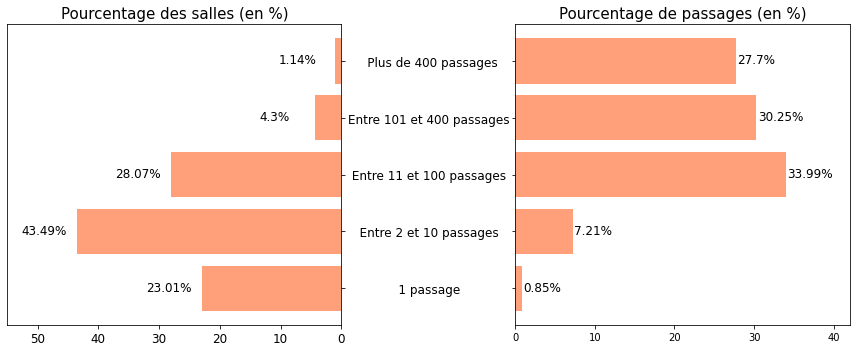

In [31]:
#On définit nos axes
y = range(5)
x1 = nbr_pass_per_gym_final["en_%_des_salles"]
x2 = nbr_pass_per_gym_final["en_%_de_passages"]

#On créé nos deux graphes l'un en face de l'autre pour pouvoir mieux comparer
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
axes[0].barh(y, x1, align='center', color= 'lightsalmon')
axes[1].barh(y, x2, align='center', color= 'lightsalmon')
axes[0].invert_xaxis()

#on affiche les titres
axes[0].set_title("Pourcentage des salles (en %)",fontsize= 15 )
axes[1].set_title("Pourcentage de passages (en %)",fontsize= 15 )

#on affiche nos groupes de passages
axes[0].set(yticks= range(5), yticklabels=nbr_pass_per_gym_final["group_passages"], xlim = (55,0))
axes[1].set(yticks= range(5), yticklabels=nbr_pass_per_gym_final["group_passages"], xlim = (0,42))
axes[0].yaxis.tick_right()

axes[0].tick_params(labelsize=12)

#pour la lisibilité on prend les mêmes intervalles pour notre axe x
axes[1].set_xticks(np.arange(0, 41, 10))

#on affiche les valeurs à même le graphique
label1 = nbr_pass_per_gym_final["en_%_des_salles"].to_list()
label2 = nbr_pass_per_gym_final["en_%_de_passages"].to_list()
for i in range(len(label1)):
    axes[0].text(x = label1[i]+ 9.2 , y = i - 0.05, s = "{}%".format(label1[i]), size = 12, horizontalalignment='left')
    axes[1].text(x = label2[i]+0.2 , y = i - 0.05, s = "{}%".format(label2[i]), size = 12)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.52)

plt.show()

- On s'aperçoit qu'un peu plus de 1% des salles représentent plus de 27% des passages d'adhérents, ce qui est énorme.

- A l'opposé 23% des salles n'ont qu'un seul et unique passage d'adhérent.

- Il serait intéressant de peut-être plus communiquer sur les salles peu visitées, qui pourraient plaire à d'autres adhérents.

###### Fréquentations par les adhérents

Voyons maintenant comment les utilisateurs utilisent leur abonnement.

Tout d'abord ne gardons que les adhérents actifs (quelqu'un qui a résilié son abonnement dès Août n'est pas représentatif de l'utilisation de l'abonnement Gymlib)

In [32]:
#on merge df2 et df3 pour pouvoir garder uniquement les adhérents actifs
merge1 = pd.merge(df2,df3, on = "user_id", how = 'right')
merge1_active = merge1[merge1["statut_user"] == "active"]

Faisons attention à notre *merge* qui peut ne pas afficher les utilisateurs actifs mais ne s'étant pas rendu à la salle les trois derniers mois. Il est important de signaler le paramètre "how" = right pour prendre en compte ces adhérents.

In [33]:
#on créé un Dataframe avec le nombre de passages dans les salles sur 3 mois des utilisateurs 
user_gym_count = pd.DataFrame(merge1_active.groupby(["user_id"])["gym_id"].count())
user_gym_count.columns = ["count_passages"]
user_gym_count.reset_index(inplace = True)
user_passage_count = pd.DataFrame(user_gym_count.groupby(["user_id"])["count_passages"].sum()).reset_index()
user_passage_count.head()

,user_id,count_passages
0,59c8aefbe59ffcce7e1a7ee5,8
1,59fc82789d0be43f052c8e4c,43
2,59fc82c73de7c751043b530b,6
3,59fc82f0a91931172715eb5e,0
4,59fc830aa59d41c4053b9036,13


In [34]:
# on divise notre colonne par 3 pour avoir la moyenne de passages par mois
user_passage_count["count_passages"] = user_passage_count["count_passages"]/3

In [35]:
user_passage_count["count_passages"].describe()

count    1941.000000
mean        3.301391
std         3.527459
min         0.000000
25%         0.666667
50%         2.333333
75%         4.666667
max        25.000000
Name: count_passages, dtype: float64

On peut voir qu'en moyenne chaque utilisateur se rend un peu plus de 3 fois par mois dans une salle partenaire. Certains n'ont qu'une visite et un utilisateur s'y rend 25 fois en moyenne par mois (!).

Faisons un rapide détour pour analyser ce "super" sportif.

###### Le plus grand sportif!

Avec 25 passages en un mois voyons voir l'usage de l'abonnement de cet adhérent super-sportif. Va t-il toujours dans la même salle tous les jours ou presque?

In [36]:
user_max = user_passage_count["count_passages"].idxmax()
user_max_id = user_passage_count.loc[user_max,"user_id"]
salles_max_user = df2[(df2["user_id"] == user_max_id ) & (df2["months"] == '2019-10-01')].groupby("gym_id")["code"].count()
print(salles_max_user)
print("Il a visité {} salles différentes seulement sur le mois d'octobre".format(len(salles_max_user)))

gym_id
574bbc689f3ce3c256428686    1
5a0303353762577ced17a742    2
5b2bbc187341a56566b55cb7    5
5bdc547413dfc46471bf112a    1
5c177c5a95a0982643a1ecc2    6
5c2dd2c274e87e4fb2a1757e    6
5c9252ae03458570acbdaa6f    1
5cd9923445df734564a18f89    1
5ce4fcea80cf680390e8141a    1
5d1080bd0761184027728ff9    1
5d3f02f62638a8684eb0a20e    2
5d725cf4ac576008823cf933    7
Name: code, dtype: int64
Il a visité 12 salles différentes seulement sur le mois d'octobre


On se rend compte qu'il a visité 12 salles en seulement 1 mois. Est-ce la même chose sur les autres mois?

In [37]:
salles_max_user_08 = df2[(df2["user_id"] == user_max_id ) & (df2["months"] == '2019-08-01')].groupby("gym_id")["code"].count()
salles_max_user_09 = df2[(df2["user_id"] == user_max_id ) & (df2["months"] == '2019-09-01')].groupby("gym_id")["code"].count()


print("Il a visité {} salles différentes seulement sur le mois d\'{} et {} sur le mois de {}".format( len(salles_max_user_08), "Août", len(salles_max_user_09), "Septembre")) 

Il a visité 11 salles différentes seulement sur le mois d'Août et 9 sur le mois de Septembre


Soit notre adhérent est un super sportif avec beaucoup de temps libre, soit il se peut qu'il fraude en prétant son abonnement à des amis!

Il serait intéressant de voir si les salles sont éloignés les unes des autres pour essayer de détecter une véritable fraude.

Dans tous les cas cette personne ne fait pas partie du coeur de cible de Gymlib, qui si elle n'avait que des adhérents de ce genre, n'aura pas un business model rentable.

###### Reprise de l'étude

Catégorisons maintenant nos utilisateurs en fonction de leur moyenne de passages en salles par mois. Pour cela nous pouvons nous aider des quartiles obtenu avec la fonction *describe()* pour les deux premières catégories. Ensuite nous choisirons nos porpres catégories.

- Inactifs :Moins d'une fois par mois
- Irréguliers : Entre 1 et 3 passages par mois
- Réguliers : Entre 4 et 8 passages par mois
- Assidus: Entre 9 et 14 passages par mois
- Accros : Entre 15 et 20 passages par mois
- Fraudeurs? : Plus de 20 passages par mois


In [38]:
#on arrondit notre nombre de passages
user_passage_count["count_passages"] = user_passage_count["count_passages"].round(2)

#crééons nos catégories
bins = [0,1,4,9,15,21,26]
labels = ["     Inactifs [<1]", "   Irréguliers [1:3]","   Réguliers [4:8]","    Assidus [9:14]","   Accros [15:20]"," Fraudeurs? [+20]"]
user_passage_count["group_sportifs"] = pd.cut(user_passage_count["count_passages"],bins=bins, labels=labels, right=False)

#on créé notre colonne de pourcentage de passages d'un adhérent/total adhérent
#on multiplie par 3 car notre Df merge1_active comprend les données des 3 mois
user_passage_count["pourcentage_passage_adhérent"] = round(((user_passage_count["count_passages"]*3)/merge1_active.shape[0])*100,2)

#on créé notre colone de pourcentage d'adhérents
user_passage_count["pourcentage_adhérent_total"] = round((1/df3[df3["statut_user"] == "active"].shape[0])*100,2)

#on groupby pour avoir nos valeurs par catégories créées
final_user_df = user_passage_count.groupby("group_sportifs")[["pourcentage_passage_adhérent","pourcentage_adhérent_total"]].sum().round(2)
final_user_df.reset_index(inplace = True)

final_user_df

,group_sportifs,pourcentage_passage_adhérent,pourcentage_adhérent_total
0,Inactifs [<1],2.56,26.20
1,Irréguliers [1:3],27.25,39.20
2,Réguliers [4:8],42.23,24.05
3,Assidus [9:14],20.79,6.15
4,Accros [15:20],6.89,1.30
5,Fraudeurs? [+20],1.07,0.15


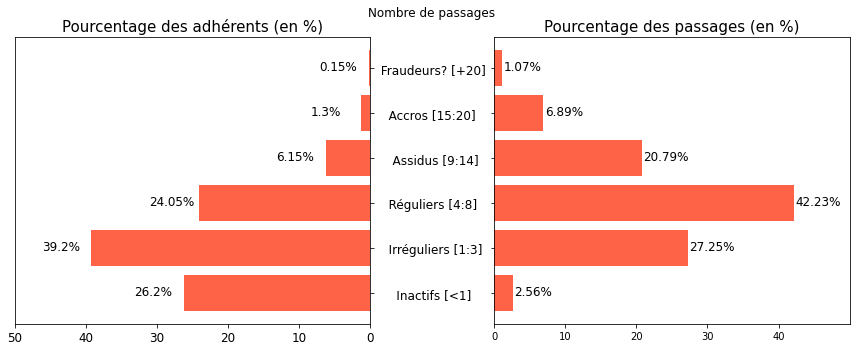

In [39]:
#On définit nos axes
y = range(6)
x1 = final_user_df["pourcentage_adhérent_total"]
x2 = final_user_df["pourcentage_passage_adhérent"]

#On créé nos deux graphes l'un en face de l'autre pour pouvoir mieux comparer
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
axes[0].barh(y, x1, align='center', color= 'tomato')
axes[1].barh(y, x2, align='center', color= 'tomato')
axes[0].invert_xaxis()

#on affiche les titres
axes[0].set_title("Pourcentage des adhérents (en %)", fontsize= 15 )
axes[1].set_title("Pourcentage des passages (en %)", fontsize= 15 )

#on affiche nos groupes de passages
axes[0].set(yticks= range(6), yticklabels= final_user_df["group_sportifs"], xlim = (50,0))
axes[1].set(yticks= range(6), yticklabels= final_user_df["group_sportifs"], xlim = (0,50))
axes[0].yaxis.tick_right()

axes[0].tick_params(labelsize=12)

#pour la lisibilité on prend les mêmes intervalles pour notre axe x
axes[1].set_xticks(np.arange(0, 41, 10))

#on affiche les valeurs à même le graphique
label1 = final_user_df["pourcentage_adhérent_total"].to_list()
label2 = final_user_df["pourcentage_passage_adhérent"].to_list()
for i in range(len(label1)):
    axes[0].text(x = label1[i]+ 7 , y = i - 0.05, s = "{}%".format(label1[i]), size = 12, horizontalalignment='left')
    axes[1].text(x = label2[i]+0.2 , y = i - 0.05, s = "{}%".format(label2[i]), size = 12)

    
#on affiche un texte entre les deux graphes pour la compréhension
plt.text(0.43, 0.94, "Nombre de passages", fontsize= 12, transform=plt.gcf().transFigure)

fig.tight_layout()
fig.subplots_adjust(wspace=0.35)

plt.show()

- Nous pouvons donc voir que la grande majorité des passages sont réalisés par le coeur de cible de Gymlib, c'est à dire des personnes se rendant à la salle de manière régulières mais peu excessives (2 fois par semaine ou moins pour 89% des adhérents).

- Les sportifs assidus voir très assidus ne sont que 7.5% environ mais représentent un peu plus de 28% des passages en salle.

- Nous avons 0.15% de cas suspects (ou de supers-sportifs) qui se rendent à la salle plus de 20 fois par mois. 

###### Conclusions

De cette première partie de notre analyse nous pouvons remarquer que :

- une petite proportion des salles génère la grande majorité des passages d'adhérents. Il faut garder ces salles qui font vivre le réseau Gymlib. Les meilleures salles pourraient se voir recevoir des attentions particulières de la part de Gymlib (événènement Gymlib, communication pour la salle...).


- un grand nombre de salles ne sont quasiment pas visitées par les adhérents. Il faudrait pouvoir communiquer plus sur ces salles auprès du réseau Gymlib qui pourraient séduire les adhérents ou motiver de nouvelles personnes à s'inscrire pour des activités moins conventionnelles.  


- Le coeur de cible de Gymlib appraît clairement suite à cette analyse. 63% des adhérents se rendent 1 à 8 fois par mois dans des salles partenaires. 


- Il faut garder un oeil sur les adhérents "inactifs", qui ont toujours un abonnement mais ne se sont rendus qu'une fois voir aucune fois en salle les trois derniers mois. Ces personnes pourraient à terme résilier leur abonnement si ils n'en voient pas l'utilité. Une campagne de mailing pour ces personnes pourrait les remotiver.  


- Les grands sportifs (entre 9 et 20 séances par mois) utilisent beaucoup le service Gymlib mais leur montant reversé total doit être élevé. Afin de garder une marge intéressante sur ces utilisateurs très investis dans le sport il pourrait être intéressant d'envisager des services complémentaires sur-facturés comme le font déja certaines salles : serviettes propres, tracking personnalisé détaillé de leurs séances, location de matériel...  


- La fraude est un vrai enjeu pour Gymlib. Nous avons remarqué qu'une petite minorité se rendait plus de 20 fois par mois en salle. Il peut-être nécessaire dans certains cas d'alerter les salles partenaires afin qu'elles effectuent des contrôle d'identité sur ces utilisateurs.


###### Pour aller plus loin

Avec le nom ou les activités de chaque salle partenaire nous aurions pu analyser de façon plus fine quels étaient le type de salles qui attire le plus de monde. De plus nous aurions pu voir à l'intérieur de chaque catégorie quelles salles fonctionnent le mieux et celles qui n'attirent pas d'adhérents.

## b) Quelles entreprises sont les plus sportives?

Nous avons accès au nombre d'employés par entreprise, étudions quels sont les entreprises les plus sportives en observant le nombre d'abonnés Gymlib par entreprise.

Tout d'abord regardons le nombre d'abonnés ou anciens abonnés par entreprises

In [40]:
df3.groupby("company_id")["user_id"].count()

company_id
208732121      429
294892643     1178
323246782      119
380070690      357
461510553       40
674264823       10
825995937      109
863285309       18
881725560       46
2120362044      42
Name: user_id, dtype: int64

Comparons cela aux chiffres présents dans notre colonne du premier onglet *effectif eligible*

In [41]:
company_sportives = pd.merge(df1[["company_id","effectif_eligible_08"]],df3.groupby("company_id")["user_id"].count(), on = ["company_id"])
company_sportives.columns = ["company_id","effectif_eligible","nbr_of_sportifs"]
company_sportives

,company_id,effectif_eligible,nbr_of_sportifs
0,208732121,2808,429
1,294892643,5500,1178
2,323246782,178,119
3,380070690,4000,357
4,461510553,293,40
5,674264823,8,10
6,825995937,360,109
7,863285309,15,18
8,881725560,160,46
9,2120362044,200,42


Nous avons deux cas intriguants où nous avons plus d'adhérents Gymlib que d'effectifs éligbles. 
Regadrons plus précisemment ce qu'il en est pour essayer de comprendre ou de corriger ces deux *outliers*

### Première entreprise

Dans le premier cas nous avons 18 abonnés pour 15 employés éligibles, vérifions cela:

In [42]:
company_1 = df3[df3["company_id"] == 863285309]["user_id"].to_list()
print("Il y a eu {} employés uniques qui ont été ou sont adhérents".format(len(company_1)))
company_1

Il y a eu 18 employés uniques qui ont été ou sont adhérents


['5cb6fea156bf888d4759e622',
 '5b96af35e1eedc47a31690bf',
 '5d4951cef6d9d24e1f1c22ac',
 '5b8e4cc90a9a9e7ab3fd466d',
 '5b83ec5feb5aac186ba14bc7',
 '5c79693f9ecefb4f80d3f8b3',
 '5b891aa2d6609d4906312bcc',
 '5b84f9dddd3cf1447ccfdefb',
 '5d9b1e3d85b8baa94e3eb2e3',
 '5b83c6ad2ff5bb78f4527fbf',
 '5d76143f7ddcc23397c833ca',
 '5b892e974e7ec94875b6ab59',
 '5b83ef362ff5bb78f45280a1',
 '5b8422bc8af1504d7887d530',
 '5c75619962babd7fa6c9bcbc',
 '5b87d4d8c2527c178ef7fd09',
 '5b840221134066789aad3580',
 '5b8ce546e64aab109b0865ec']

In [43]:
company_1_df = pd.DataFrame(columns = ['code', 'gym_id', 'months', 'user_id', 'company_id',
       'montant_reversé_pass'])

for i in company_1:
    subframe = df2[df2['user_id'].str.contains(i)]
    company_1_df = company_1_df.append(subframe)
    
company_1_df.groupby(["user_id","months"])["code"].count()   
#on créé un tableau indiquant le nombre de passages par employés par mois pour cette entreprise

user_id                   months    
5b83c6ad2ff5bb78f4527fbf  2019-08-01     4
                          2019-09-01     1
                          2019-10-01     5
5b83ec5feb5aac186ba14bc7  2019-08-01     4
                          2019-09-01     6
                          2019-10-01     9
5b83ef362ff5bb78f45280a1  2019-08-01     1
                          2019-09-01     3
                          2019-10-01     1
5b8422bc8af1504d7887d530  2019-09-01     1
5b84f9dddd3cf1447ccfdefb  2019-09-01     3
                          2019-10-01     4
5b891aa2d6609d4906312bcc  2019-08-01     3
                          2019-09-01     6
                          2019-10-01     9
5b892e974e7ec94875b6ab59  2019-08-01     4
                          2019-10-01     1
5b8ce546e64aab109b0865ec  2019-08-01     3
                          2019-09-01     6
5b8e4cc90a9a9e7ab3fd466d  2019-08-01     3
                          2019-10-01     1
5b96af35e1eedc47a31690bf  2019-09-01     2
                 

Nous pouvons voir qu'il y a bien eu 15 personnes différentes qui ont utilisé leur abonnement dans une salle partenaire dans les trois derniers mois.

Pour ce qui est des trois utilisateurs restants tentons de savoir ce qu'il est advenu d'eux :

In [44]:
user_id_company_1_active = company_1_df["user_id"].unique()
user_id_company_1_total = df3["user_id"][df3["company_id"] == 863285309]
three_mysterious_user = list(set(user_id_company_1_total) - set(user_id_company_1_active))
    
df3.loc[df3["user_id"].isin(three_mysterious_user),:]

,user_id,company_id,zipcode,country,age,statut_user
1143,5d9b1e3d85b8baa94e3eb2e3,863285309,75019.0,France,32.0,active
2089,5b87d4d8c2527c178ef7fd09,863285309,78000.0,France,34.0,canceled
2305,5b840221134066789aad3580,863285309,76000.0,France,NaN,canceled


On peut remarquer deux d'entre eux ont résilié leur abonnement, on peut donc imaginer qu'ils aient quitté l'entreprise. Cependant l'un d'eux est encore actif :

In [45]:
df2[df2["user_id"] =="5d9b1e3d85b8baa94e3eb2e3"]

,code,gym_id,months,user_id,company_id,montant_reversé_pass


Il semble qu'il ne soit pas rendu à une salle partenaire ces trois derniers mois tout simplement.
Or nous pouvons voir ci dessous qu'il y a 3 personnes qui ont résilié leur abonnement, il nous manque donc un utilisateur qui aurait utilisé une des salles partenaires pendant ces trois mois mais qui aurait résilié son abonnement dans cette même période de temps.

In [46]:
df3[(df3["statut_user"] == "canceled") & (df3["company_id"] == 863285309)]

,user_id,company_id,zipcode,country,age,statut_user
2089,5b87d4d8c2527c178ef7fd09,863285309,78000.0,France,34.0,canceled
2305,5b840221134066789aad3580,863285309,76000.0,France,NaN,canceled
2343,5b8ce546e64aab109b0865ec,863285309,75010.0,France,27.0,canceled


il s'agit du *user_id* 5b8ce546e64aab109b0865ec , voyons voir son historique de passage en salle.

In [47]:
df2[df2["user_id"] =="5b8ce546e64aab109b0865ec"]

,code,gym_id,months,user_id,company_id,montant_reversé_pass
401,1892292,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
778,3652174,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
9036,42550441,5c4b211a75a1e967353a2343,2019-08-01,5b8ce546e64aab109b0865ec,863285309,10.0
9111,42966672,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
9891,46751574,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
11599,54393240,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
11762,55217708,5bd0833c93b5b71a6851b431,2019-08-01,5b8ce546e64aab109b0865ec,863285309,10.0
12849,60470123,5bd0833c93b5b71a6851b431,2019-09-01,5b8ce546e64aab109b0865ec,863285309,10.0
16336,76901855,5c3c56e2304d254e255d72ce,2019-08-01,5b8ce546e64aab109b0865ec,863285309,16.0


On peut voir qu'il est passé uniquement en août et septembre, il a donc pu résilier son abonnement à la rentrée.

On peut supposer que la colonne *effectif_eligible*  ne prenne pas en compte les personnes qui ont déja utilisé l'abonnement Gymlib mais qui l'ont par la suite résilié. Cette colonne ne prendrait alors en compte que les employés n'ayant pas souscrit à l'abonnement, donc de potentiels futurs clients ou bien ceux étant actuellement abonné, laissant de côté les personnes ayant résilié leur abonnement. Voyons voir si nous pouvons vérifier notre hypothèse avec la deuxième entreprise qui avait elle aussi un *effectif_eligible* inférieur au nombre d'utilisateurs ayant un *user_id*

### Deuxième entreprise

Dans ce cas nous avons 10 abonnés pour 8 employés éligibles : 

In [48]:
company_2 = df3[df3["company_id"] == 674264823]["user_id"].to_list()
print("Il y a eu {} employés uniques qui ont été ou sont adhérents".format(len(company_2)))
company_2

Il y a eu 10 employés uniques qui ont été ou sont adhérents


['5ac7333379bd316f3ce84734',
 '5aba0a22b0f4d328dcd35538',
 '5bf25f80da6c837a1409d8e0',
 '5cb49ac256bf8873cd59d267',
 '5b2376f12245bc3a5dea7d4a',
 '5aba099cb0f4d328dcd35535',
 '5ab9fe6723a5e9768b92382f',
 '5b694d6a5a760d50dde4828b',
 '5bf19392660f927fe11f7cb0',
 '5abce21cb9280c1c8f8a2976']

In [49]:
company_2_df = pd.DataFrame(columns = ['code', 'gym_id', 'months', 'user_id', 'company_id',
       'montant_reversé_pass'])

for i in company_2:
    subframe = df2[df2['user_id'].str.contains(i)]
    company_2_df = company_2_df.append(subframe)
    
company_2_df.groupby(["user_id","months"])["code"].count()
#on recréé le même tableau que ci-dessus

user_id                   months    
5ab9fe6723a5e9768b92382f  2019-08-01     1
                          2019-09-01    18
                          2019-10-01    12
5aba099cb0f4d328dcd35535  2019-08-01    19
                          2019-09-01    14
                          2019-10-01    13
5aba0a22b0f4d328dcd35538  2019-08-01    16
                          2019-09-01     9
                          2019-10-01    11
5abce21cb9280c1c8f8a2976  2019-08-01     6
                          2019-09-01    12
                          2019-10-01     4
5ac7333379bd316f3ce84734  2019-08-01     5
5b2376f12245bc3a5dea7d4a  2019-08-01    12
                          2019-09-01    18
                          2019-10-01    16
5b694d6a5a760d50dde4828b  2019-08-01    11
                          2019-09-01     9
                          2019-10-01     7
5bf19392660f927fe11f7cb0  2019-08-01     3
                          2019-09-01     1
                          2019-10-01     2
5bf25f80da6c837a1

Voyons voir si notre première hypothèse est toujours valide. Dans ce cas il faudrait que deux employés aient résilié leur abonnement

In [50]:
user_id_company_2_active = company_2_df["user_id"].unique()
user_id_company_2_total = df3["user_id"][df3["company_id"] == 674264823]
    
df3.loc[df3["user_id"].isin(company_2),:]

,user_id,company_id,zipcode,country,age,statut_user
126,5ac7333379bd316f3ce84734,674264823,92500.0,France,29.0,active
598,5aba0a22b0f4d328dcd35538,674264823,75020.0,France,NaN,active
612,5bf25f80da6c837a1409d8e0,674264823,92300.0,France,26.0,active
742,5cb49ac256bf8873cd59d267,674264823,75011.0,France,25.0,active
776,5b2376f12245bc3a5dea7d4a,674264823,75011.0,France,30.0,active
777,5aba099cb0f4d328dcd35535,674264823,75011.0,France,31.0,active
1051,5ab9fe6723a5e9768b92382f,674264823,75010.0,France,43.0,active
1172,5b694d6a5a760d50dde4828b,674264823,75019.0,France,NaN,active
1633,5bf19392660f927fe11f7cb0,674264823,92120.0,France,30.0,active
1866,5abce21cb9280c1c8f8a2976,674264823,75003.0,France,47.0,active


Malheuresement pour notre hypothèse cette fois nous voyons que tous les utilisateurs de cette entreprise sont bien actifs et aucun d'eux n'a résilié son contrat.

La seconde expliquation la plus plausible nous vient directement du site Gymlib :
*Vous pouvez parrainer autant de collègues que vous souhaitez et jusqu’à 2 proches de votre choix si votre entreprise a souscrit à l’option parrainage des proches.*

Ces deux personnes seraient donc rattaché directement à l'entreprise car elles ont été parrainés par un employé de cette entreprise (et un filleul parrainé ne peut pas parrainer à son tour une autre personne extérieure, donc chaque filleul est directement lié à un employé et donc à une entreprise).

Cela expliquerait pourquoi ces personnes apparaissent dans notre tableau 3 comme lié à l'entreprise mais n'apparaissent pas dans notre *effectif_eligible* (qui doit provenir d'une autre source) car elles ne font pas partie de l'entreprise! Seul leur parrain est un employé.

##### Suite de l'étude

Nous pouvons maintenant continuer notre étude sur les entreprises. Pour cela nous allons corriger nos valeurs pour les deux entreprises étudiées au dessus. Cependant, avec notre hypothèse des parrains/filleul externe on ne pourra pas savoir quelle est véritablement le nombre d'employés *réels*  dans notre tableau 3. 

Ainsi il se pourrait que dans la première entreprise que nous avons étudié, sur les 18 adhérents, il n'y en ai que 6 qui soient réellement employés de l'entreprise. En effet chaque employés peut parrainer jusqu'à deux personnes externes. Ceci est un cas extrême mais possible. Nos résultats auront donc une marge d'erreur, surtout sur des petites entreprises où quelques externes peuvent beaucoup faire varier le ratio entre employés réels adhérents et employés éligibles.

In [51]:
company_sportives.columns = ["company_id","effectif_eligible","nbr_of_sportifs"]

Calculons le ratio pour voir quels entreprises sont les plus sportives!

In [52]:
company_sportives["ratio"] = round(company_sportives["nbr_of_sportifs"] / (company_sportives["effectif_eligible"]),2)
sport_graph = company_sportives.sort_values("ratio", ascending = False)
sport_graph

,company_id,effectif_eligible,nbr_of_sportifs,ratio
5,674264823,8,10,1.25
7,863285309,15,18,1.20
2,323246782,178,119,0.67
6,825995937,360,109,0.30
8,881725560,160,46,0.29
1,294892643,5500,1178,0.21
9,2120362044,200,42,0.21
0,208732121,2808,429,0.15
4,461510553,293,40,0.14
3,380070690,4000,357,0.09


Comme prévu nous avons deux valeurs aberrantes que nous allons corriger en remplaçant le nombre d'adhérents par l'effectif éligible.

In [53]:
sport_graph.loc[5,"nbr_of_sportifs"] = sport_graph.loc[5,"effectif_eligible"]
sport_graph.loc[7,"nbr_of_sportifs"] = sport_graph.loc[7,"effectif_eligible"]
sport_graph.loc[5,"ratio"] = 1
sport_graph.loc[7,"ratio"] = 1

In [54]:
sport_graph

,company_id,effectif_eligible,nbr_of_sportifs,ratio
5,674264823,8,8,1.00
7,863285309,15,15,1.00
2,323246782,178,119,0.67
6,825995937,360,109,0.30
8,881725560,160,46,0.29
1,294892643,5500,1178,0.21
9,2120362044,200,42,0.21
0,208732121,2808,429,0.15
4,461510553,293,40,0.14
3,380070690,4000,357,0.09


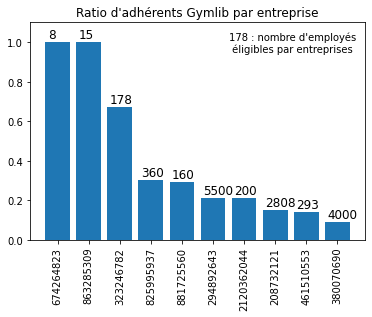

In [55]:
fig, ax = plt.subplots()

ax.bar(range(10), sport_graph["ratio"])

x_labels = sport_graph["company_id"].unique()
ax.set(ylim = [0,1.10])
plt.xticks(range(10), x_labels, rotation = "vertical")
plt.title("Ratio d'adhérents Gymlib par entreprise")

label = sport_graph["effectif_eligible"].to_list()

for i in range(len(label)):
    plt.text(x =i - 0.32, y = sport_graph["ratio"].to_list()[i] + 0.02, s = label[i], size = 12)

plt.annotate(xy = (5.5,0.95), s = "178 : nombre d'employés\n éligibles par entreprises")
    
plt.show()

Il semblerait que les entreprises de grandes tailles soient moins portés sur le sport que les PME.

Il serait malhabile de continuer une analyse pour confirmer cela étant donné que notre échantillon représentatif (10 entreprises) est très faible. Nous ne pouvons tirer de conclusions sur la base de ces données, cependant cela semble aller dans le sens des conclusions des observations de Gymlib !

<img src="gymlib_adhésion.png">

###### Conclusions

- Les adhérents Gymlib d'une entreprise peuvent parrainer jusqu'à 2 externes ce qui serait une explication à pourquoi certaines entreprises ont plus d'adhérents Gymlib que d'employés. Il faudrait pouvoir clairement séparer ces adhérents externes afin de ne pas fausser nos analyses.


- Les petites entreprises semblent plus sportives que les grosses avec un plus grand ratio d'employés ayant adhéré à Gymlib. Il est donc important de continuer à trouver des clients parmis les PME, qui seront très engagés, quand bien même elles rapportent peut-être moins que les grandes entreprises.

###### Aller plus loin

Il nous faudrait plus de données afin de consolider nos résultats. 10 entreprises représentent un panel trop petit pour tirer des conclusions solides. 

Il nous faudrait aussi connaître la nature de chaque entreprise. Ainsi peut-être qu'une entreprise basé sur le sport comprendra bien plus de sportifs dans son effectif, cela pouvant faire varier les résultats!

Enfin il faudrait connaître le nombre d'opérations spéciales (privatisations, ateliers...) créé par Gymlib dans une entreprise pour voir si cela fait varier ou non le nombre d'adhérents dans l'entreprise.

## c) Montant reversé par pass

Une des données les plus importantes de nos dataset est le montant reversé par pass. 
Comme expliqué plus haut, à chaque fois qu'un employé se rend dans une salle partenaire, un montant est reversé à la salle par Gymlib.

En regardant plus en détail le montant reversé par un utilisateur pour une salle et un mois donné on se rend compte d'une particularité :

In [56]:
df2[(df2["user_id"] == "5b224712ace91d7184c70a25") & (df2["months"] == "2019-08-01") & (df2["gym_id"] == "5a831028620799070de2c4a5")].sort_values(by = "gym_id")

,code,gym_id,months,user_id,company_id,montant_reversé_pass
385,1815103,5a831028620799070de2c4a5,2019-08-01,5b224712ace91d7184c70a25,208732121,9.0
3791,17947291,5a831028620799070de2c4a5,2019-08-01,5b224712ace91d7184c70a25,208732121,0.0


Sur un même mois, pour une même salle, le passage d'un adhérent n'a pas amené à la même rémunération pour la salle de la part de Gymlib.

Cela indique que ce montant est changeant, nous allons essayer de comprendre pourquoi.

Le but de Gymlib est de maximiser ses revenues qui sont principalement le différentiel entre :

revenue = (le prix d'un abonnement/mois) - (montant reversé aux salles partenaires pour cet utilisateur/mois)

On peut imaginer que si un adhérent se rend très souvent dans des salles partenaires alors son abonnement pourrait ne pas suffire à combler le montant que Gymlib devra reversé pour l'ensemble de ces passages en salle.

##### Hypothèses

Nous établissons donc deux hypothèses :

- Soit le montant reversé par passage est dégressif en fonction du nombre de passages d'un adhérent. Ainsi si un adhérent vient souvent Gymlib reversera de moins en moins d'argent sur le mois. Certaines salles de sport propose ce type d'abonnement à leurs utilisateurs.

- Soit le montant reversé diminue en fonction du nombre d'utilisateurs unique ramené dans la salle grâce à Gymlib. Ainsi les utilisateurs peu fréquents permettent de contrebalancer le coût des utilisateurs réguliers qui coûtent plus cher.

Pour vérifier ces deux hypothèses étudions plusieurs cas spécifique : tout d'abord celui de la personne s'étant le plus rendu dans une même salle sur un même mois.

In [57]:
df2.groupby(["user_id","gym_id","months"])["code"].count().sort_values(ascending = False)

user_id                   gym_id                    months    
5ca72bb2bfe89a7c9bdfe902  5b8558a3d23a875db16976d3  2019-08-01    13
5ba21e394644594b6ccbf6d6  57cd3c0ce4c16792699a53e9  2019-08-01    12
5aba099cb0f4d328dcd35535  5b8558a3d23a875db16976d3  2019-08-01    11
5ab9fe6723a5e9768b92382f  5b8558a3d23a875db16976d3  2019-09-01    11
5c73fd5bf6df3306bdf48766  5c49911f7072773e40949752  2019-10-01    11
                                                                  ..
5c75619962babd7fa6c9bcbc  5950d02381345caa1ce327d7  2019-09-01     1
                          595f5752b2e9c64372720278  2019-08-01     1
                                                    2019-09-01     1
                          5ac3a5084b5b16717acbb3f8  2019-08-01     1
59c8aefbe59ffcce7e1a7ee5  5bdc660e57e3310b8bb4c62c  2019-10-01     1
Name: code, Length: 10507, dtype: int64

Regardons à présent si le montant reversé à varier au cours du mois pour cette personne : 

In [58]:
max_user = df2[(df2["user_id"] == "5ca72bb2bfe89a7c9bdfe902") & (df2["gym_id"] == "5b8558a3d23a875db16976d3") & (df2["months"] == "2019-08-01")]
print("Gymlib a du reverser {}€ à cette salle pour le mois d'Août de cet utilisateur".format(max_user["montant_reversé_pass"].sum()))
max_user

Gymlib a du reverser 226.0€ à cette salle pour le mois d'Août de cet utilisateur


,code,gym_id,months,user_id,company_id,montant_reversé_pass
940,4452868,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,17.0
1275,6072762,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0
2113,10091434,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0
3766,17851103,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,16.0
3903,18496236,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0
9115,42982141,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,16.0
9451,44734305,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,16.0
11428,53705095,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0
13089,61611511,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0
17224,80997251,5b8558a3d23a875db16976d3,2019-08-01,5ca72bb2bfe89a7c9bdfe902,825995937,18.0


Malgré ses 13 passages le montant reversé par pass ne semble pas avoir beaucoup bouger, il varie de 16 à 18€. Cela représente 226€ sur seulement le mois d'août.

Il ne s'agit donc pas d'un tarif dégressif par nombre de passages d'un même employé.

Regardons pour cette même salle quel est le montant reversé après le passage d'autres utilisateurs.

In [59]:
max_gym_08 = df2[(df2["gym_id"] == "5b8558a3d23a875db16976d3") & (df2["months"] == "2019-08-01")]
max_gym_08["montant_reversé_pass"].describe()

count    307.000000
mean      17.097720
std        0.944659
min       16.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       18.000000
Name: montant_reversé_pass, dtype: float64

Malgré 307 passages d'adhérents sur le mois d'août on peut voir que le minimum du montant reversé est de 16€ et le maximum est de 18€. 

Vérifions rapidement ce qu'il en est pour les deux mois suivants : 

In [60]:
max_gym_09 = df2[(df2["gym_id"] == "5b8558a3d23a875db16976d3") & (df2["months"] == "2019-09-01")]
max_gym_09["montant_reversé_pass"].describe()

count    369.000000
mean      16.745257
std        0.914934
min       16.000000
25%       16.000000
50%       16.000000
75%       18.000000
max       18.000000
Name: montant_reversé_pass, dtype: float64

In [61]:
max_gym_10 = df2[(df2["gym_id"] == "5b8558a3d23a875db16976d3") & (df2["months"] == "2019-10-01")]
max_gym_10["montant_reversé_pass"].describe()

count    397.000000
mean      16.622166
std        0.869408
min       16.000000
25%       16.000000
50%       16.000000
75%       18.000000
max       18.000000
Name: montant_reversé_pass, dtype: float64

On obtient les mêmes résultats donc nos deux hypothèses sont fausses.
###### Séances à 0€

Essayons un autre cas particulier, celui de salle à qui Gymlib reverse le moins d'argent pour un passage. 

In [62]:
min_montant_idx = df2["montant_reversé_pass"].idxmin()
df2.loc[min_montant_idx ,:]

code                                      348291
gym_id                  574bbc689f3ce3c2564289dc
months                       2019-09-01 00:00:00
user_id                 5b914a6b282d3a31612e7160
company_id                             208732121
montant_reversé_pass                           0
Name: 73, dtype: object

On s'aperçoit qu'une salle partenaire reverse 0€ pour certains passages, ce qui peut sembler étonnant. Regardons cela de plus près pour cette salle en regardant quand on lieu les passages à 0€ reversé : 

In [63]:
df2[(df2["gym_id"] == "574bbc689f3ce3c2564289dc")].groupby(["user_id","months","montant_reversé_pass"])["code"].count()

user_id                   months      montant_reversé_pass
5b914a6b282d3a31612e7160  2019-09-01  0.0                     1
5ba4f3e60516306f0746d7f9  2019-08-01  6.4                     2
                          2019-09-01  6.4                     3
5bc220a840cb76732beefb6b  2019-09-01  6.4                     1
5bf2b72e8612221984f5a101  2019-09-01  0.0                     1
                                      6.4                     4
                          2019-10-01  6.4                     5
5c65222f1c9ac33f4efec002  2019-08-01  0.0                     1
5c7d407805a1af565540d7e5  2019-08-01  0.0                     1
5c87a6a8f05c3964e606473d  2019-09-01  6.4                     1
                          2019-10-01  6.4                     1
5ccfffd069e4656589aa3333  2019-08-01  6.4                     1
                          2019-09-01  6.4                     2
                          2019-10-01  6.4                     6
5cd56be4d0e6b073d616c01e  2019-08-01  0.0    

Ces passages "gratuits", où 0€ sont reversés à la salle sont uniques par *user_id* et correspondent à chaque fois au premier passage de l'adhérent (tout du moins sur ces trois mois).

On peut donc raisonnablement supposer que ces passages à 0€ correspondent à une première séance d'essai pour l'adhérent, comme le propose un grand nombre de salle de sport en France. Il s'agit d'une séance d'essai qui a pu être négocié avec les salles partenaires.

##### Montant moyen reversé par entreprise

Regardons à présent si nous trouvons des différences dans les montants reversés aux salles partenaires en fonction des entreprises.

Nous enlèverons les montant reversé de 0€ qui sont des séances d'essai à part et ne sont pas représentatives des montants habituellement reversés.

De plus nous ne garderons que les 5 salles avec le plus de passages pour pouvoir comparer les montants reversé par plusieurs entreprises entre eux pour une même salle.

In [64]:
free_trials = df2["montant_reversé_pass"] != 0
top_5_gyms = df2.pivot_table(index = "gym_id", values = "code", aggfunc = "count").sort_values(by = "code",ascending = False)
top_5_gyms.reset_index(inplace = True)
list_top_5 = top_5_gyms["gym_id"].head(5).to_list()

montant_company = df2.loc[df2["gym_id"].isin(list_top_5),:][free_trials].pivot_table(index = ["gym_id","company_id"], values = "montant_reversé_pass", aggfunc = "mean")
montant_company

C:\Users\Pikto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


montant_reversé_pass
gym_id                   company_id                      
5b2bbc187341a56566b55cb7 208732121              16.825397
                         294892643              16.797619
                         323246782              16.875000
                         380070690              16.968750
                         461510553              16.909091
                         825995937              16.901235
                         863285309              16.250000
                         2120362044             17.333333
5b8558a3d23a875db16976d3 208732121              16.701031
                         294892643              16.805019
                         323246782              16.832461
                         380070690              16.974359
                         461510553              16.000000
                         674264823              16.794643
                         825995937              16.828947
                         863285309              16.741935
                         2120362044             16.500000
5c18f55dd11b003e38e5a7e5 208732121              17.394111
                         294892643              17.413052
                         323246782              18.392714
                         380070690              17.837495
                         461510553              18.449684
                         674264823              18.050893
                         825995937              17.395757
                         881725560              17.610839
5c2dd2c274e87e4fb2a1757e 208732121              17.387761
                         294892643              17.684759
                         323246782              17.706448
                         380070690              17.318332
                         461510553              17.605705
                         825995937              18.518444
                         881725560              17.639490
                         2120362044             17.776172
5c2dd44774e87e4fb2a17597 208732121              17.332006
                         294892643              17.570528
                         323246782              17.197379
                         380070690              17.579266
                         461510553              17.656681
                         825995937              17.351354
                         881725560              16.079834

Il semble y avoir très peu de différence dans les montants reversés d'une entreprise à une autre en fonction d'une même salle. Vérifions cela rapidement en calculant l'écart type de ces moyennes par salle.

In [65]:
montant_company.reset_index(inplace = True)
montant_company.groupby(["gym_id"])["montant_reversé_pass"].std()

gym_id
5b2bbc187341a56566b55cb7    0.296972
5b8558a3d23a875db16976d3    0.287130
5c18f55dd11b003e38e5a7e5    0.438962
5c2dd2c274e87e4fb2a1757e    0.364784
5c2dd44774e87e4fb2a17597    0.542457
Name: montant_reversé_pass, dtype: float64

L'écart type n'est jamais que d'environ 0.50€ au maximum. 

Cela nous montre qu'en fonction des entreprises les tarifs restent quasiment les mêmes. On peut émettre l'hypothèse que les variations de prix d'un ou deux euros sont plutôt lié :

- à l'horaire de réservation, comme dans les abonnements classiques dans certaines salles les tarifs peuvent varier en fonction de l'horaire de la séance (heures creuses/heures pleines). Le salarié n'en a pas conscience quand il réserve car il ne voit pas le prix mais le montant reversé diffère automatiquement.


- comme dans l'application Grand Public où l'utilisateur peut obtenir une réduction supplémentaire en réservant 5 ou 10 séances à l'avance, peut-être existe-il un système similaire pour fidéliser un adhérent à une salle partenaire. Cependant cette option ne semble pas être confirmée par la FAQ Gymlib Pro qui indique qu'un seul code est généré par jour. Il ne semble pas être possible d'en générer à l'avance.

##### Montant moyen par entreprise par salarié

Regardons à présent si les montant reversé diffère beaucoup par entreprise sur ces trois mois et comparons ces montants à la taille de l'entreprise.

In [66]:
montant_entreprise = round(df2.groupby("company_id")["montant_reversé_pass"].mean(),2)
montant_entreprise.columns = ["company_id","moyenne_montant_reversé"]
montant_entreprise = pd.DataFrame(montant_entreprise)
montant_entreprise.reset_index(inplace = True)
montant_entreprise

,company_id,montant_reversé_pass
0,208732121,14.03
1,294892643,15.16
2,323246782,14.36
3,380070690,15.55
4,461510553,16.24
5,674264823,16.79
6,825995937,17.05
7,863285309,15.05
8,881725560,15.68
9,2120362044,15.67


In [67]:
temp1 = df2.pivot_table(index = ["company_id","user_id"], values = "code", aggfunc = "count")
temp1.reset_index(inplace = True)
nbr_of_sportives_3_months = temp1.groupby("company_id")["user_id"].count()
sportives_and_montant = pd.merge(montant_entreprise,nbr_of_sportives_3_months, on = "company_id")
sportives_and_montant.columns = ["company_id","moyenne_montant_reversé","nbr_of_sportifs"]
sportives_and_montant

,company_id,moyenne_montant_reversé,nbr_of_sportifs
0,208732121,14.03,336
1,294892643,15.16,1006
2,323246782,14.36,90
3,380070690,15.55,256
4,461510553,16.24,39
5,674264823,16.79,10
6,825995937,17.05,98
7,863285309,15.05,15
8,881725560,15.68,40
9,2120362044,15.67,40


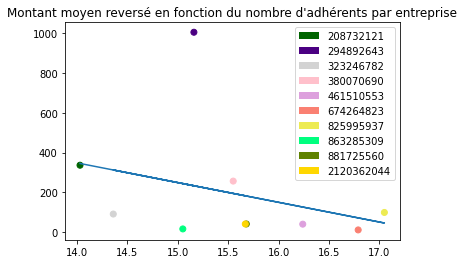

In [68]:
import matplotlib.patches as mpatches
import matplotlib

N = 10
fig , ax = plt.subplots()
c = ['#006400', '#4B0082', '#D3D3D3', '#FFC0CB', '#DDA0DD','#FA8072', '#edeb53', '#00FF7F', '#5f8200', '#FFD700']
scatter = ax.scatter(sportives_and_montant["moyenne_montant_reversé"],sportives_and_montant["nbr_of_sportifs"], c=c)

# On créé la légende avec des couleurs différents pour chaque entreprise
recs = []
for i in range(0,10):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=c[i]))
    
plt.legend(recs,sportives_and_montant["company_id"],loc="upper right") 

x = np.array(sportives_and_montant["moyenne_montant_reversé"].to_list())
y = np.array(sportives_and_montant["nbr_of_sportifs"].to_list())

m, b = np.polyfit(x,y, 1) # On créé une droite ajustée sur les coordonnées de nos points pour évaluer la tendance
plt.plot(x, m*x + b)

plt.title("Montant moyen reversé en fonction du nombre d'adhérents par entreprise")


plt.show()

On peut apercevoir une tendance : plus l'entreprise est petite plus le montant moyen reversé aux salles partenaires semblent élevés. 

Hypothèses : 

- Les adhérents des petites entreprise ont tendance à aller vers des activités plus chers/des salles de standing supérieur  


- Les adhérents des petites entreprise testent plus d'activités que les grandes entreprises (ce qui peut amener à tester des choses "originales" donc plus onéreuses). Ils auraient donc une utilisation plus complète de leur abonnement, ce que semble confirmer l'engagement des petites entreprises supérieur à celui des grandes comme vu sur le graphe de Gymlib plus haut.

Vérifions cela rapidement avec le montant moyen reversé par adhérent pour chaque entreprise.

In [69]:
temp2 = df2.groupby("company_id")["montant_reversé_pass"].sum().round()
temp3 = sportives_and_montant[["company_id","nbr_of_sportifs"]]
montant_moyen_par_adhérent = pd.merge(temp2,temp3,on = "company_id")
montant_moyen_par_adhérent["montant_moyen_reversé_par_adhérent"] = round(montant_moyen_par_adhérent["montant_reversé_pass"]/montant_moyen_par_adhérent["nbr_of_sportifs"],2)
montant_moyen_par_adhérent.sort_values("montant_moyen_reversé_par_adhérent", ascending = False)

,company_id,montant_reversé_pass,nbr_of_sportifs,montant_moyen_reversé_par_adhérent
5,674264823,4382.0,10,438.20
6,825995937,22114.0,98,225.65
4,461510553,7487.0,39,191.97
9,2120362044,7395.0,40,184.88
2,323246782,16459.0,90,182.88
1,294892643,172689.0,1006,171.66
8,881725560,6460.0,40,161.50
3,380070690,37759.0,256,147.50
0,208732121,47213.0,336,140.51
7,863285309,1927.0,15,128.47


Effectivement, on retrouve principalement des petites entreprises en haut des montant moyen reversé par adhérent.

###### Conclusions

- Certaines salles proposent des séances d'essais au premier passage d'adhérents Gymlib (cependant comme l'employé paye un abonnement, cela pourrait seulement avoir un impact pour Gymlib via le premier montant reversé qui serait nul). Gymlib ramène un nouveau "client"/adhérent à la salle partenaire qui en échange accepte de ne pas se voir reverser d'argent pour cette première visite.


- Le montant reversé par passage fluctue légèrement, peut-être en fonction de l'horaire de passage (heures creuses/pleines) ou de la façon d'acheter des pass (un pass unique ou plusieurs d'un coup) (même si cette dernière hypothèse nous paraît moins probable)



- Les petites entreprises utilisent plus Gymlib et d'une façon plus variée, ce qui leur coûte aussi plus cher


###### Aller plus loin 

- Il nous faudrait connaître les salles qui proposent ou non des séances d'essais ou d'autres tarifs préférentiels et sous quelles conditions.


- Il faudrait pouvoir connaître les conditions qui déterminent le montant reversé par adhérent. En ayant simplement connaissance des salles qui font partie de la même chaîne de salle on pourrait peut-être apercevoir certains patterns, ou bien en connaissant les heures/jours de passages (et pas seulement le mois).


- En connaissant le type d'activités dans chaque salle on pourrait déterminer quels entreprises ou tranche d'âge sont les plus "curieuses" (testent le plus d'activités différentes) ou les plus passionées d'un seul sport.

## d) Le MRR (Monthly Recurrent Revenue)

Le MRR du premier onglet est une information capitale pour Gymlib. Il s'agit comme expliqué au début des revenues (et non pas des bénéfices) généré par chacune des entreprises. Essayons de comprendre comment ce montant évolue en fonction des mois.

In [70]:
df1[["company_id","mrr_entreprise_08","mrr_entreprise_09","mrr_entreprise_10"]]

,company_id,mrr_entreprise_08,mrr_entreprise_09,mrr_entreprise_10
0,208732121,6395.00,6395.00,9000.00
1,294892643,5500.00,5500.00,7000.00
2,323246782,4205.11,4205.11,4564.07
3,380070690,3651.52,3651.52,5360.00
4,461510553,600.00,600.00,600.00
5,674264823,200.00,200.00,200.00
6,825995937,3062.50,3062.50,3062.50
7,863285309,458.00,458.00,458.00
8,881725560,1552.00,1552.00,1552.00
9,2120362044,1000.00,1000.00,1000.00


On s'aperçoit que ce montant reste le même sur les trois mois pour la plupart des entreprises sauf pour les quatres premières. 

Regardons l'évolution du nombre d'adhérents par entreprise sur ces trois mois.

In [71]:
temp4 = df2.pivot_table(index = ["company_id","months","user_id"], values = "code", aggfunc = "count")
temp4.reset_index(inplace = True)
temp4 = pd.DataFrame(temp4.groupby(["company_id","months"])["user_id"].count())
temp4.reset_index(inplace = True)

#On vérifie que pour chaque entreprise le nombre d'abonnés a augmenté sur cette période en créant une nouvelle colonne 

for i in range(0,30,3):
    valeur_finale = temp4.loc[i+2,"user_id"]
    valeur_initiale = temp4.loc[i,"user_id"]
    temp4.loc[i,"évolution_adhérents"] = (round(((valeur_finale - valeur_initiale)/(valeur_initiale))*100,2))
    

temp4 = temp4.groupby(["company_id"])["évolution_adhérents"].last()

#Ensuite on calcule l'évolution du MRR sur les trois mois

temp5 = df1[["company_id","mrr_entreprise_08","mrr_entreprise_09","mrr_entreprise_10"]].copy()

temp5["évolution_MRR"] = round(((temp5["mrr_entreprise_10"] - temp5["mrr_entreprise_08"])/temp5["mrr_entreprise_08"])*100,2)

#On merge nos deux datframe pour pouvoir comparer les deux évolutions : 

augmentation_vs_MMR = pd.merge(temp4,temp5[["évolution_MRR",'company_id']] , on = "company_id")

#On étudie la corrélation entre nos deux colonnes
print("Entre nos deux colonnes d'évolution, la corrélation est égale à {}".format(augmentation_vs_MMR["évolution_adhérents"].corr(augmentation_vs_MMR["évolution_MRR"])))

#On affiche notre tableau au propre
for i in range(10):
    augmentation_vs_MMR.loc[i,"évolution_adhérents"] = "{}%".format(augmentation_vs_MMR.loc[i,"évolution_adhérents"])
    augmentation_vs_MMR.loc[i,"évolution_MRR"] = "{}%".format(augmentation_vs_MMR.loc[i,"évolution_MRR"])
    
augmentation_vs_MMR

Entre nos deux colonnes d'évolution, la corrélation est égale à -0.0973930009498729


,company_id,évolution_adhérents,évolution_MRR
0,208732121,29.86%,40.73%
1,294892643,33.17%,27.27%
2,323246782,33.9%,8.54%
3,380070690,52.55%,46.79%
4,461510553,161.54%,0.0%
5,674264823,-10.0%,0.0%
6,825995937,24.62%,0.0%
7,863285309,20.0%,0.0%
8,881725560,-3.23%,0.0%
9,2120362044,125.0%,0.0%


On observe que le nombre de passages des adhérents augmentent entre Août et Octobre (un effet des grandes vacances possiblement) sauf pour 2 entreprises qui voient leur nombre d'adhérents diminuer un peu. Or le MRR ne suit pas cette tendance, il est totalement décorrelé de l'évolution du nombre d'adhérents comme le prouve le coefficient de corrélation de Pearson.

On en déduit que le MRR est un revenu fixe que Gymlib facture aux entreprises, qui peut varier selon certaines conditions (mais pas le nombre de passages des adhérents en salles partenaires).

On peut déja vérifier si le MRR et la taille de l'entreprise sont corrélés et si ils le sont plus en Octobre qu'en Août: 

In [72]:
print(round(df1["mrr_entreprise_08"].corr(df1["effectif_eligible_08"]),4))
print(round(df1["mrr_entreprise_10"].corr(df1["effectif_eligible_08"]),4))

0.7288
0.7812


Voyons si le MRR est plus lié au nombre d'adhérents:

In [73]:
nbr_adhérents_company = pd.DataFrame(temp1.groupby("company_id")["user_id"].count()).reset_index()["user_id"]
print(round(df1["mrr_entreprise_08"].corr(nbr_adhérents_company),4))
print(round(df1["mrr_entreprise_10"].corr(nbr_adhérents_company),4))

0.7002
0.7026


Il apparaît que le MMR est principalement correlé à l'effectif éligible de l'entreprise, plus qu'à son nombre d'adhérents à Gymlib. 

###### Conclusions

- Le MRR correspond à une somme fixe versé par les entreprises pour la mise à disposition du service Gymlib et ne varie pas directement en fonction du nombre de passages ou d'adhérents. Cependant en fonction de la taille de l'entreprise on note une variation dans le MRR. Cela doit correspondre à un montant négocié avec l'entreprise en fonction des moyens à déployer pour installer la solution Gymlib et communiquer dessus.


- On peut supposer que l'augmentation du MRR, au vu de l'augmentation du coefficient de corrélation entre Août et Octobre, correspond à une renégociation annuelle de Gymlib pour accorder ses prix avec la taille de l'entreprise.


- D'après les cas clients du site , on peut voir qu'en plus de proposer un accès aux salles aux employés des entreprises clientes, Gymlib propose tout un ensemble de services comme avec des ateliers Gymlib avec Deloitte, accompagner des entreprises dans leur démarche QVT comme avec GRT Gaz. On peut imaginer qu'à la rentrée les entreprises aient décidé d'investir dans ce type de services pour redynamiser leurs équipes après les vacances et améliorer leur politique QVT. 

###### Aller plus loin

Il serait intéressant d'avoir le nombres d'interventions "spéciales" (ateliers, privatisation) mis à disposition des entreprises afin de pouvoir mieux comprendre le calcul du MRR. 

## e) Les adhérents ayant résilié leur abonnement

Intéressons nous aux abonnement qui ne sont plus actifs, potentiellement des personnes mécontentes du service ou bien qui après un essai n'ont pas été conquises. 

Il est primordial pour Gymlib de parvenir à baisser le nombre de personnes qui résilient leur contrat. Le coût d'acquisition d'un client peut être élevé alors tâchons de les garder par la suite!

A quoi est lié ce désengagment de certains salariés?

- en fonction du prix de l'abonnement pour le salarié? Cela dépend de ce que l'entreprise prend en charge, malheuresement nous n'avons pas accès à ces données
- en fonction de l'entreprise?
- en fonction de leur lieu d'habitation?
- en fonction de leur âge?
- en fonction des salles visitées?


Voyons déja le nombre de personnes ayant annulé leur abonnement

In [74]:
print(df3["statut_user"].value_counts())
print("{}% des utilisateurs ont annulé leur abonnement Gymlib".format(round((df3["statut_user"].value_counts()[1])/(df3["statut_user"].value_counts()[0])*100),2))

active      1941
canceled     407
Name: statut_user, dtype: int64
21.0% des utilisateurs ont annulé leur abonnement Gymlib


D'après nos calculs, 21% des utilisateurs ont annulé leur abonnement Gymlib. Ce qui semble bien loin de ce qu'une étude Gymlib, que l'on a déja vu plus haut, obtient comme résultat:

<img src="attrition.png">

On rappelle que le taux d'attrition correspond *au ratio (nombre de clients perdus / nombre de clients total) mesuré sur une période donnée qui est le plus souvent l'année.*

Cela peut s'expliquer en partie par le fait que notre fichier nous donne potentiellement toutes les personnes ayant résilié leur abonnement depuis la création de l'offre pro de Gymlib en 2017. Or le taux d'attrition se calcule sur les résiliations de l'année. Ainsi il nous faudrait refaire notre calcul uniquement avec les résiliations de l'année 2019 et disposer des données de l'année entière pour pouvoir juger correctement.

On peut ainsi imaginer que le service en s'améliorant (plus de salles, plus d'accompagnement auprès des entreprises) a permis de faire chuter ce taux d'attrition.

###### Résiliation par entreprise

Nous pouvons tout de même regarder de plus près si nous notons des différences en fonction de certains critères, comme par exemple l'entreprise.

In [75]:
df3_ratio = df3.pivot_table(index = ["company_id","statut_user"], values = "user_id", aggfunc = "count")
df3_ratio.reset_index(inplace = True)
df3_ratio.rename(columns = {"user_id" :"count_statut"}, inplace = True)

# on ajoute une ligne avec la valeur zéro car sinon elle n'apparaît pas et cela faussera notre graph plus loin
df3_ratio.loc[-1] = [674264823,'canceled',0]  
df3_ratio = df3_ratio.sort_values(["company_id","statut_user"])
df3_ratio.reset_index(drop = True, inplace = True)  
df3_ratio

,company_id,statut_user,count_statut
0,208732121,active,332
1,208732121,canceled,97
2,294892643,active,970
3,294892643,canceled,208
4,323246782,active,100
5,323246782,canceled,19
6,380070690,active,312
7,380070690,canceled,45
8,461510553,active,34
9,461510553,canceled,6


In [76]:
#maintenant calculons le ratio par entreprise pour plus de lisibilité
for i in range(0,19,2):
    df3_ratio.loc[i,"ratio"] = round(df3_ratio.loc[i+1,"count_statut"]*100/df3_ratio.loc[i,"count_statut"])
    df3_ratio.loc[i+1,"ratio"] = df3_ratio.loc[i,"ratio"] 
    
df3_ratio

,company_id,statut_user,count_statut,ratio
0,208732121,active,332,29.0
1,208732121,canceled,97,29.0
2,294892643,active,970,21.0
3,294892643,canceled,208,21.0
4,323246782,active,100,19.0
5,323246782,canceled,19,19.0
6,380070690,active,312,14.0
7,380070690,canceled,45,14.0
8,461510553,active,34,18.0
9,461510553,canceled,6,18.0


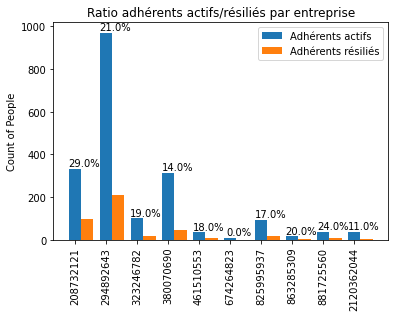

In [77]:
#Enfin créons un graphique pour mieux visualiser la situation



fig, ax = plt.subplots()

ind = np.arange(10)
width = 0.4

bar1 = ax.bar(ind, df3_ratio["count_statut"][df3_ratio["statut_user"] == "active"], width, label = "Active")
bar2 = ax.bar(ind+width, df3_ratio["count_statut"][df3_ratio["statut_user"] == "canceled"], width, label='Canceled')
xlabels = df3_ratio["company_id"].unique()
plt.xticks(range(10), xlabels, rotation = "vertical")

ax.set_ylabel('Count of People')
ax.set_title('Ratio adhérents actifs/résiliés par entreprise')

rects = ax.patches

for rect, ratio in zip(rects,df3_ratio["ratio"].unique()):
    height = rect.get_height()
    ax.text((rect.get_x() + rect.get_width() / 2) + 0.3, height + 3, "{}%".format(ratio),
            ha='center', va='bottom')
legend = ["Adhérents actifs","Adhérents résiliés"]

plt.legend(legend,loc="upper right")

plt.show()

On observe de grandes disparités entre les entreprises. Voyons voir si cela est lié à la taille de l'entreprise.

In [78]:
ratio_attrition_company = pd.DataFrame(df3_ratio.groupby(["company_id"])["ratio"].sum()/2).reset_index()
comparaison_effectif_ratio = pd.merge(df1[["company_id","effectif_eligible_10"]],ratio_attrition_company, on = "company_id")
print("Le taux de corrélation entre la taille de l'effectif éligible et le ratio adhérents actifs/résiliés est de {}".format(round(comparaison_effectif_ratio["ratio"].corr(comparaison_effectif_ratio["effectif_eligible_10"]),3)))
comparaison_effectif_ratio.sort_values("ratio", ascending = False)

Le taux de corrélation entre la taille de l'effectif éligible et le ratio adhérents actifs/résiliés est de 0.283


,company_id,effectif_eligible_10,ratio
0,208732121,2808,29.0
8,881725560,160,24.0
1,294892643,5500,21.0
7,863285309,15,20.0
2,323246782,178,19.0
4,461510553,293,18.0
6,825995937,360,17.0
3,380070690,4000,14.0
9,2120362044,200,11.0
5,674264823,8,0.0


On voit que le taux de corrélation est bas, on ne peut donc rien en déduire sur l'influence de la taille de l'entreprise sur le nombre de résiliations.

###### Résiliation par zone géographique

Observer la taille de l'entreprise n'a rien donné, essayons cette fois avec le lieu d'habitation des employés, qui nous est donné par le code postal de chacun dans l'onglet 3.

Créons une nouvelle colonne avec seulement les départements et observons si nous avons des différences au niveau du statut des utilisateurs.

In [79]:
df3["département"] = df3.zipcode.astype(str).str[:2]

df3["département"].value_counts().head(15)

75    1138
92     525
94     160
78     102
93      93
95      55
91      50
77      40
59      24
33      15
44      14
0.      13
69      12
31      11
76      11
Name: département, dtype: int64

Nous observons quelques départements en province tels que le Nord(59), la Gironde (33), la Loire-Atlantique (44) ou le Rhône (69) qui dépassent les 10 adhérents. Cela correspond à de grandes villes : Lille, Bordeaux, Nantes, Lyon...

Cependant la très grand majorité des adhérents GymLib se situent en Île de France.
Ce que confirme le top 15 des code postaux des adhérents ci dessous

In [80]:
df3["zipcode"].value_counts().head(15)

75017.0    163
75015.0    128
75011.0     91
75018.0     89
92400.0     69
92300.0     66
75010.0     63
75014.0     59
75009.0     58
75012.0     57
92200.0     56
75020.0     49
75008.0     45
75013.0     43
75016.0     43
Name: zipcode, dtype: int64

Pour notre étude focalisons nous sur les arrondissements Parisiens, qui, rassemblés, représentent la grande majorité des adhérents Gymlib. Observons les plus précisément :

In [81]:
df3["zipcode"][df3["département"] == "75"].value_counts()

75017.0    163
75015.0    128
75011.0     91
75018.0     89
75010.0     63
75014.0     59
75009.0     58
75012.0     57
75020.0     49
75008.0     45
75013.0     43
75016.0     43
75007.0     37
75019.0     37
75116.0     36
75002.0     34
75003.0     28
75006.0     23
75005.0     23
75004.0     18
75001.0     12
75914.0      1
7500.0       1
Name: zipcode, dtype: int64

Nous apercevons quelques spécificités et une coquille.

- Le code postal 75116 correspond à une partie du 16 ème arrondissement, nous allons donc fusionner les deux sous le code postal 75016.
- Le 75914, après recherche internet, se trouve dans le 13 ème arrondissement. 
- Enfin un code postal est erroné, le 7500, à moins que la personne se trouve en Belgique à Tournai, or son pays est marqué comme France. Dans le doute nous l'écarterons de notre étude sur les arrondissements.

In [82]:
df3["zipcode"] = df3["zipcode"].replace({75116 : 75016, 75914 : 75013})

Maintenant tentons de visualiser géographiquement le ratio adhérents actifs/résiliés par arrondissement. Pour cela nous allons utiliser un fichier Json disponible à ce  [lien](https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb) qui nous permet de visualiser les arrondissements Parisiens.

In [83]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
import json
from IPython.display import HTML
from pyensae.notebookhelper import folium_html_map

geo = json.load(open("arrondissements.geojson"))

In [84]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geo_data = geo ,geo_str = geo)
paris

C:\Users\Pikto\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


On a le numéro d'arrondissement (item c_ar dans properties) et le ratio par arrondissement d'adhérents qui ont "cancelled" : 

In [85]:
[arr["properties"]["c_ar"] for arr in geo["features"]]

[15, 10, 12, 1, 2, 19, 11, 9, 18, 5, 8, 16, 17, 20, 6, 13, 3, 7, 4, 14]

Maintenant calculons le ratio d'ahdérents actifs/résiliés sur chacun de nos arrondissements.

In [86]:
df3["zipcode"] = df3["zipcode"].astype(int)
#on créé un dataframe avec nos valeurs de user active ou canceled
paris_ratio = df3[df3["zipcode"].between(75000,75021)].pivot_table(index = ["zipcode","statut_user"], values = "user_id", aggfunc = 'count')
paris_ratio 

user_id
zipcode statut_user         
75001   active             9
        canceled           3
75002   active            30
        canceled           4
75003   active            22
        canceled           6
75004   active            18
75005   active            20
        canceled           3
75006   active            22
        canceled           1
75007   active            31
        canceled           6
75008   active            37
        canceled           8
75009   active            47
        canceled          11
75010   active            52
        canceled          11
75011   active            77
        canceled          14
75012   active            49
        canceled           8
75013   active            36
        canceled           8
75014   active            53
        canceled           6
75015   active           102
        canceled          26
75016   active            70
        canceled           9
75017   active           136
        canceled          27
75018   active            72
        canceled          17
75019   active            31
        canceled           6
75020   active            43
        canceled           6

Nous pouvons voir que dans le 4 ème arrondissement nous n'avons pas de *cancelled*, rajoutons une ligne avec un 0.

In [87]:
paris_ratio.loc[(75004,'canceled'),:] = 0
paris_ratio = paris_ratio.sort_values(["zipcode","statut_user"])
paris_ratio.reset_index(inplace = True)
paris_ratio.rename(columns = {"user_id" :"count_statut"}, inplace = True)

Maintenant créons notre colonne ratio :

In [88]:
for i in range(0,39,2):
    paris_ratio.loc[i,"ratio"] = round(paris_ratio.loc[i+1,"count_statut"]*100/paris_ratio.loc[i,"count_statut"])
    paris_ratio.loc[i+1,"ratio"] = paris_ratio.loc[i,"ratio"] 
    
paris_ratio

,zipcode,statut_user,count_statut,ratio
0,75001,active,9.0,33.0
1,75001,canceled,3.0,33.0
2,75002,active,30.0,13.0
3,75002,canceled,4.0,13.0
4,75003,active,22.0,27.0
5,75003,canceled,6.0,27.0
6,75004,active,18.0,0.0
7,75004,canceled,0.0,0.0
8,75005,active,20.0,15.0
9,75005,canceled,3.0,15.0


In [89]:
#on extrait les ratios dans l'odre des arrondissements
ratio_paris_list = list(paris_ratio["ratio"])
ratio_paris_list = ratio_paris_list[::2]
ratio_paris_list

[33.0,
 13.0,
 27.0,
 0.0,
 15.0,
 5.0,
 19.0,
 22.0,
 23.0,
 21.0,
 18.0,
 16.0,
 22.0,
 11.0,
 25.0,
 13.0,
 20.0,
 24.0,
 19.0,
 14.0]

In [90]:
ratio_arrondissement = pd.DataFrame({
    "Arrondissement" : sorted([arr["properties"]["c_ar"] for arr in geo["features"]]), 
    "Ratio" : [ratio for ratio in ratio_paris_list]
})

ratio_arrondissement


,Arrondissement,Ratio
0,1,33.0
1,2,13.0
2,3,27.0
3,4,0.0
4,5,15.0
5,6,5.0
6,7,19.0
7,8,22.0
8,9,23.0
9,10,21.0


Pour compléter cette carte chloroplètes j'ai besoin d'un peu d'aide, je trouve des explications sur comment utiliser ma fonction **chloropeth()** en ligne : 

*Pour relier ces informations à la carte, toujours dans la fonction choropleth(), nous devons définir les éléments suivants :*

- *geo_str : les contours au format GeoJSON*  
- *key_on : l'item dans le GeoJSON avec lequel nous ferons la jointure*  
- *data : le DataFrame dans lequel nous avons les informations statistiques*  
- *columns : les deux colonnes à prendre*  
     - *clé de jointure*  
     - *mesure statistique*  
 
- *fill_color : la palette de couleurs à utiliser (provenant de Color Brewer)*  

In [104]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geo_data = geo ,geo_str = geo, key_on = "feature.properties.c_ar",
                 data = ratio_arrondissement, columns = ["Arrondissement", "Ratio"],
                 fill_color = "OrRd")
paris

Il semblerait que certains arrondissements ou zones géographiques (Nord/Est de Paris ou Sud) soient plus sujets à la résiliation.

Au contraire les deux taux les plus bas se trouvent en plein centre avec le 4 ème et le 6 ème arrondissement.

Cette différence pourrait s'expliquer par :

- Le type de population qui vit dans chaque quartier (certains quartiers sont plus cossu ou plus populaires, certains sont très animés ou très résidentiels..)
- Le nombre de salles partenaires présentes dans chacun de ces arrondissements. Si j'ai peu de salles autour de chez moi peut-être suis-je plus enclin à résilier mon abonnement.

Cependant cette carte a plusieurs limites:

- Le nombre d'adhérents (actifs et résiliés confondus) diffèrent beaucoup d'un arrondissement à l'autre (163 adhérents dans le 17 ème Vs 18 dans le 4 ème). Certains arrondissements diposent de trop peu de données utilisateurs pour offrir des statistiques fiables
- Il faudrait pouvoir combiner cela avec les lieux de travail de chacun. En effet, le domicile et le travail sont les deux principales endroits où un utilisateur passe du temps et un utilisateur peut très bien aller dans des salles autour de son travail sans se soucier des salles près de chez lui. Disposer de la l'adresse du lieu de travail permettrait de consolider ces résultats.

Cependant cette approche donne une idée de ce qui pourrait être fait avec plus de données à disposition.

###### Résiliation par âge

Regardons enfin si le taux de résiliation est influencé par l'âge, dernière donnée utilisateurs dont nous disposons.

Tout d'abord gardons uniquement les lignes où l'âge apparait et éliminons les colonnes inutiles à notre analyse.

In [92]:
age_df = df3.copy()
age_df.dropna(subset = ["age"],inplace = True)
age_df.drop(columns = ['département','country','company_id'], inplace = True)
age_df

,user_id,zipcode,age,statut_user
0,5db74c2948defd35145798dd,59173,34.0,active
5,5ba8a44d36702a299ae8a33c,0,27.0,active
8,5db71ee08961c823e12bcd42,92700,27.0,active
9,5da4bccdac9f05ae7a9de606,92700,29.0,active
10,5d35c83e84868e8679ad3440,92700,33.0,active
...,...,...,...,...
2337,5cc02c9e56bf889fbe5a313e,94170,27.0,canceled
2338,5ba241454644594b6ccbfa11,92800,26.0,canceled
2342,5b9a504986c9de4e5193e826,75010,27.0,canceled
2343,5b8ce546e64aab109b0865ec,75010,27.0,canceled


In [93]:
ages = sorted(age_df["age"].unique())
for age in ages:
    print(age, end = " ")

4.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 

L'âge d'un des utilisateurs est 4 ans, il s'agit d'une erreur. Supprimons la ligne en question.

In [94]:
age_df = age_df[age_df["age"] > 5]

In [95]:
age_df_ac = age_df.groupby(["age","statut_user"])["user_id"].count().reset_index()
age_df_ac

,age,statut_user,user_id
0,19.0,active,1
1,19.0,canceled,1
2,20.0,active,3
3,20.0,canceled,2
4,21.0,active,9
5,21.0,canceled,1
6,22.0,active,21
7,22.0,canceled,2
8,23.0,active,49
9,23.0,canceled,18


Nous avons trop peu d'utilisateurs pour chaque année unique pour faire une étude, il vaut mieux rassembler les utilisateurs par tranche d'âge. Nous avons 32 valeurs, nous ferons donc 6 groupes distincts.

Le premier groupe et le dernier auront 7 âges unique. En effet pour 19 ans et 50 ans nous avons peu d'utilisateurs donc cela influera très peu sur nos résultats.

In [96]:
bins = [19,26,32,38,44,51]
labels = ["19-25 ans", "26-31 ans","32-37 ans","38-43 ans","44-50 ans"]
age_df_ac["age_group"] = pd.cut(age_df_ac["age"],bins=bins, labels=labels, right=False)
age_df_ac.drop(columns = ["age"], inplace = True)
age_df_ac.columns = ["statut_user","nbr_adhérents","age_group"]

In [97]:
group_age_df = pd.DataFrame(age_df_ac.groupby(["age_group","statut_user"])["nbr_adhérents"].sum()).reset_index()

#on créé notre nouvelle colonne ratio
for i in range(0,10,2):
    group_age_df.loc[i,"ratio"] = round(group_age_df.loc[i+1,"nbr_adhérents"]*100/group_age_df.loc[i,"nbr_adhérents"])
    group_age_df.loc[i+1,"ratio"] = group_age_df.loc[i,"ratio"] 
    
group_age_df

,age_group,statut_user,nbr_adhérents,ratio
0,19-25 ans,active,358,26.0
1,19-25 ans,canceled,94,26.0
2,26-31 ans,active,770,19.0
3,26-31 ans,canceled,148,19.0
4,32-37 ans,active,256,21.0
5,32-37 ans,canceled,53,21.0
6,38-43 ans,active,110,10.0
7,38-43 ans,canceled,11,10.0
8,44-50 ans,active,76,9.0
9,44-50 ans,canceled,7,9.0


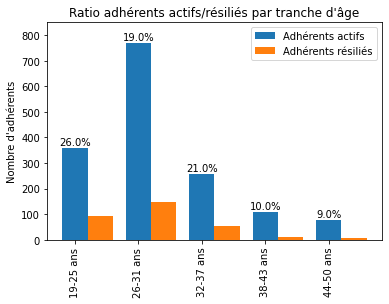

In [98]:
#Enfin créons un graphe du ratio de résiliation par tranche d'âge

fig, ax = plt.subplots()

ind = np.arange(5)
width = 0.4

bar1 = ax.bar(ind, group_age_df["nbr_adhérents"][group_age_df["statut_user"] == "active"], width, label = "Active")
bar2 = ax.bar(ind+width, group_age_df["nbr_adhérents"][group_age_df["statut_user"] == "canceled"], width, label='Canceled')
xlabels = group_age_df["age_group"].unique()
plt.xticks(range(5), xlabels, rotation = "vertical")

ax.set_ylabel("Nombre d\'adhérents")
ax.set_title("Ratio adhérents actifs/résiliés par tranche d\'âge")
ax.set(ylim = [0,850])

rects = ax.patches

for rect, ratio in zip(rects,group_age_df["ratio"].unique()):
    height = rect.get_height()
    ax.text((rect.get_x() + rect.get_width() / 2), height + 3, "{}%".format(ratio),
            ha='center', va='bottom')
legend = ["Adhérents actifs","Adhérents résiliés"]

plt.legend(legend,loc="upper right")

plt.show()

Il semble que plus les adhérents sont jeunes plus ils sont susceptibles de résilier leur contrat. Cela pourrait s'expliquer de plusieurs façons : 

- les jeunes sont plus enclin à changer de poste rapidement, certains ont donc peut-être quitté leur travail et donc résilié leur abonnement


- les jeunes sont peut-être moins intéressé par la variété d'activités/n'ont pas l'argent nécessaire pour faire des activités plus onéreuses et préfèrent finalement s'inscrire à une seule salle de sport.


- selon une [étude](http://www.sports.gouv.fr/IMG/archives/pdf/STA_INFO_n_05-05.pdf) du gouvernement les jeunes font le plus de sport. Ils préfèrent peut-être donc ne pas avoir de limites à 5 fois la même salle par mois afin de pratiquer plus souvent dans leur salle.


- les personnes âgées sont peut-être plus enclins à tester de nouvelles pratiques moins "conventionnelles" proposées par Gymlib : Yoga, Aquabike, Cryothérapie...


###### Résiliation par salle

Observons si certaines salles ont vu plus de personnes résilier leur abonnement après qu'elles y soient passés durant les trois derniers mois.

Cela indiquerait que ces salles n'ont pas la qualité escompté par les adhérents

In [99]:
temp6 = pd.merge(df2,df3, on = "user_id")

#On trouve les salles les plus visités par des adhérents actifs
temp7  = temp6[temp6["statut_user"] == "active"].pivot_table(index = ["gym_id","user_id"], values = "code", aggfunc = "count")
temp7.reset_index(inplace = True)
top_salles_active = temp7.groupby(["gym_id"])["user_id"].count().sort_values(ascending = False)
top_salles_active

gym_id
5b8558a3d23a875db16976d3    224
5b2bbc187341a56566b55cb7    186
5c2dd2c274e87e4fb2a1757e    169
5c18f55dd11b003e38e5a7e5    148
5bdc4c2b27732f4fd890a1c6    124
                           ... 
5b3113e957316c36e59ca6fa      1
5b3e2d51bec1b079a3fcaabb      1
5b3f5ea9dbc5cd4e5d44cabd      1
5b438913a825d16c7adfef2d      1
574bbc689f3ce3c25642851f      1
Name: user_id, Length: 759, dtype: int64

In [100]:
#On trouve les salles les plus visités par des adhérents canceled

temp9  = temp6[temp6["statut_user"] == "canceled"].pivot_table(index = ["gym_id","user_id"], values = "code", aggfunc = "count")
temp9.reset_index(inplace = True)
top_salles_canceled = temp9.groupby(["gym_id"])["user_id"].count().sort_values(ascending = False)
top_salles_canceled

gym_id
5b8558a3d23a875db16976d3    30
5c18f55dd11b003e38e5a7e5    21
5b2bbc187341a56566b55cb7    20
5bdc4c2b27732f4fd890a1c6    19
5c2dd2c274e87e4fb2a1757e    17
                            ..
5b475ed78744126ed1b1f97a     1
5b43858d48c423582d2b6aaa     1
5b3f5ea9dbc5cd4e5d44cabd     1
5b3e24e72aef777421319053     1
574bbc689f3ce3c256428524     1
Name: user_id, Length: 280, dtype: int64

In [115]:
#on créé un dataframe en fusionant les deux précédents 
salle_ratio = pd.merge(top_salles_active,top_salles_canceled, on = ["gym_id"])
salle_ratio.reset_index(inplace = True)

#on renomme les colonnes pour la lisibilité
salle_ratio.columns = ["gym_id","count_active", "count_canceled"]

#on créé la colonne ratio
salle_ratio["ratio"] = round(salle_ratio["count_canceled"]/(salle_ratio["count_canceled"]+salle_ratio["count_active"])*100,2)

#on ne garde que les salles avec plus de 40 adhérents qui sont passés pour avoir assez données et on ne garde que le top 10
top_10_worst_ratio = salle_ratio[salle_ratio["count_active"] > 40].sort_values("ratio", ascending = False).head(10)
print(top_10_worst_ratio["ratio"].describe())
top_10_worst_ratio

count    10.000000
mean     13.306000
std       1.451767
min      12.200000
25%      12.532500
50%      12.705000
75%      13.277500
max      17.070000
Name: ratio, dtype: float64


,gym_id,count_active,count_canceled,ratio
17,574bbc689f3ce3c2564285ff,68,14,17.07
20,5ac3a5084b5b16717acbb3f8,66,11,14.29
4,5bdc4c2b27732f4fd890a1c6,124,19,13.29
23,574bbc689f3ce3c25642865c,59,9,13.24
30,5ce4fcea80cf680390e8141a,41,6,12.77
13,5bdc660e57e3310b8bb4c62c,76,11,12.64
11,5bdc67fe57e3310b8bb4c645,83,12,12.63
27,5c177c5a95a0982643a1ecc2,49,7,12.50
3,5c18f55dd11b003e38e5a7e5,148,21,12.43
9,59d34878a8b7d5aa7a1be74f,108,15,12.20


Ces salles ont été visitées par au moins 40 adhérents dans les trois derniers mois et sont celles qui ont vu passé le plus d'abonnés qui ont fini par résilier leur contrat.

Cela peut s'avérer être une simple coincidence mais il pourrait être intéressant d'aller voir sur place ce qu'il en est et si le service est de qualité suffisante.

Actuellement le système de notation sur l'appli Gymlib permet de repérer rapidement ces salles, on pourrait donc aller voir les notes de ces 10 salles.

###### Conclusions

En définitive nous avons pu observer que le taux de résiliation semble dépendre de seulement certains facteurs :

- La taille de l'entreprise ne semble pas jouer sur le taux de résiliation. Cependant certaines entreprises ont des taux bien plus haut que d'autres. Dans ce cas on peut imaginer que la politique QVT de l'entreprise n'est pas encore aboutie ou que l'offre Gymlib n'a pas été assez poussée auprès des employés
- Le code postal, du moins sur Paris, semble influer sur le taux de résiliation. Cependant ces statistiques doivent être prises avec des pincettes. En effet le faible nombre d'adhérents dans certains arrondissements, couplé à l'absence d'adresse du lieu de travail et de la complexité des facteurs démographiques de chaque arrondissement, sont autant de points faibles dans notre étude.
- L'âge cependant semble être un facteur bien plus sûr. Les jeunes sont plus enclins à résilier leur abonnement que les employés plus agés. Il serait intéressant de développer la communication auprès des employés les plus jeunes.
- Finalement certaines salles semblent avoir vu passer plus d'abonnés résiliés que d'autres. Il s'agit peut-être d'une qualité de service moindre qui aurait poussé les adhérents à résilier par la suite. Il pourrait donc être intéressant de trouver de nouvelles salles partenaires dans les mêmes quartiers afin d'offrir une alternative aux adhérents.

###### Aller plus loin

Il nous faudrait l'adresse des entreprises pour étudier plus précisemment si les zones géographiques jouent sur le nombre de résiliation. Cela pourrait permettre de visualiser des "zones blanches" où il faudrait aller développer des partenaiats avec des salles.

Il nous faudrait de plus les noms des salles partenaires (ou au moins le type d'activités qu'elles proposent) afin de voir lesquels plaisent ou non et si certaines ont "déçu" des adhérents.



# Recommandations

En conclusion, malgré quelques limites dû au manque de certaines données, nous pouvons tout de même proposer quelques recommandations stratégiques suite à notre analyse :

**A propos des entreprises clientes :**

- Continuer à développer de grands comptes pour le MRR important et les retombées en termes de communication mais ne pas oublier les PME/start-ups qui représentent des clients les plus engagés et peut-être plus friands de services supplémentaires proposés par Gymlib (QVT très mis en avant par les start-ups notamment)


- Développer des partenariats étroits avec les entreprises clientes pour être présents sur tout le processus de leur mise en place d'une politique QVT. Cela permet de faire monter le MRR en intégrant des services additionnels récurrents (ateliers, privatisations, journée Gymlib...). Se présenter comme bien plus qu'une plateforme de mise en relation.


- Se développer en province où l'offre Gymlib est encore pauvre par rapport au nombre de salle partenaires présentes en Île-de-France. Nouer des partenariats avec des chaines nationales peut-être un moyen rapide de s'implanter dans de nombreuses villes.


- Tenter de démocratiser le principe de première séance gratuite pour un nouvel utilisateur Gymlib. Comme les utilisateurs Gymlib peuvent essayer de nombreuses salles, cela permettrait d'économiser d'important montant à normalement reverser aux entreprises partenaires.



**A propos des salles partenaires :**

- Récompenser les salles les plus attractives du réseau Gymlib avec des événements ou des attentions particulières.


- Etre attentif aux salles qui ont vu passer beaucoup d'adhérents résiliés afin de s'assurer du bon niveau de service proposé (la mise en place de notes sur le site/l'application permet de faire ce suivi plus facilement). On peut ensuite leur proposer des bonnes pratiques observées chez d'autres salles partenaires pour augmenter leur attractivité.


- Plus communiquer sur les salles très peu visitées. Que ce soit par leur localisation ou la nature "originale" de leur activité il faut pouvoir mettre plus en avant ces endroits qui pourraient attirer de nouveaux adhérents ou en conforter d'autre dans leur attachement à l'offre Gymlib


**A propos des adhérents :**

- Ne pas hésiter à relancer/motiver via mail ou autres supports les adhérents très peu actifs afin d'éviter une potentielle résiliation


- Proposer des services premium aux grands sportifs (entre 9 et 20 séances par mois) pour contrebalancer les importants montant reversé chaque mois aux salles partenaires.


**A propos des résiliations :**

- Suivre de près les entreprises ayant un taux de résiliation plus important afin de leur proposer un accompagnement plus personnalisé/des bonnes pratiques. Cela permet en même temps de proposer des services additionnels. Il peut aussi falloir investir plus dans des campagnes de communication auprès des employés de cette entreprise.


- Il peut être intéressant de mener une étude plus fine sur les zones géographiques où il y a le plus de résiliation pour en comprendre la cause : "zone blanche" (manque de salles partenaires)? population plus sujette à la résiliation? ect....


- Améliorer/augmenter la communication auprès des employés les plus jeunes  (qui sont plus aptes à résilier leur abonnement) pour les motiver à adhérer puis à conserver leur abonnement. 


**A propos de la fraude :** 

- Renforcer les contrôles d'identité en communiquant en amont avec les salles partenaires à propos des utilisateurs suspects (+20 passages/mois)
